In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import statsmodels.formula.api as smf
import scipy.stats as stats


from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [2]:
sheet_name_to_read = 'Sheet1'
df = pd.read_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\probablity.xlsx' , sheet_name=sheet_name_to_read)

In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'Channelling', 'Probability', 'prediction',
       'Hot_Blast_Vol', 'Hot_Blast_Press', 'FTP', 'diff_pressure',
       'Permeability', 'Top_Diff_Press', 'Middle_Diff_Press',
       'Bottom_Diff_Press', 'ETA_CO', 'HM_PROD_RATE', 'QUAD1_Heat_loss',
       'QUAD2_Heat_loss', 'QUAD3_Heat_loss', 'QUAD4_Heat_loss',
       'Total_Heat_loss', 'Heat_loss_std', 'Periphery_Temp_avg',
       'Periphery_Temp_std', 'Uptake_tem_avg', 'Uptake_tem_std', 'Row8_avg',
       'Row8_std', 'Row9_avg', 'Row9_std', 'Row10_avg', 'Row10_std',
       'Row11_avg', 'Row11_std', 'Row12_avg', 'Row12_std', 'Row13_avg',
       'Row13_std', 'Row14_avg', 'Row14_std', 'Row15_avg', 'Row15_std',
       'Row16_avg', 'Row16_std', 'Row17_avg', 'Row17_std', 'Row18_avg',
       'Row18_std', 'Row19_avg', 'Row19_std', 'PT_520_523_avg',
       'PT_520_523_std', 'PT_524_527_avg', 'PT_524_527_std', 'PT_528_531_avg',
       'PT_528_531_std', 'PT_532_535_avg', 'PT_532_535_std', 'PT_536_539_avg',
       'PT_5

In [4]:
df.describe()

,Unnamed: 0,Channelling,Probability,prediction,Hot_Blast_Vol,Hot_Blast_Press,FTP,diff_pressure,Permeability,Top_Diff_Press,...,PT_532_535_avg,PT_532_535_std,PT_536_539_avg,PT_536_539_std,PT_Q1_std,PT_Q2_std,PT_Q3_std,PT_Q4_std,Sigmoid_Probability_New,Probability.1
count,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000,...,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000
mean,4319.671660,0.334111,0.333449,0.291257,351196.615538,3.063338,1.780769,1.282569,258.649060,0.268738,...,2.216270,0.050897,2.320857,0.044607,0.116458,0.107320,0.121755,0.138357,0.582428,0.333449
std,2514.799683,0.471708,0.299729,0.454370,27088.284994,0.209531,0.117446,0.121155,41.284645,0.041169,...,0.148865,0.085646,0.155960,0.023650,0.034237,0.031292,0.047896,0.069879,0.062403,0.299729
min,0.000000,0.000000,0.036690,0.000000,139399.143723,0.906277,0.199974,0.441605,81.288238,-0.128816,...,0.513133,0.000223,0.603420,0.005782,0.018424,0.013197,0.053413,0.022076,0.368018,0.036690
25%,2180.750000,0.000000,0.092301,0.000000,343225.315590,3.034140,1.758324,1.246564,223.756240,0.249186,...,2.187599,0.007879,2.277207,0.022681,0.090146,0.083837,0.087975,0.087316,0.535890,0.092301
50%,4221.500000,0.000000,0.179878,0.000000,354953.155869,3.110957,1.805770,1.308725,254.616767,0.270880,...,2.226250,0.016749,2.333243,0.040060,0.109421,0.099711,0.109925,0.130375,0.573631,0.179878
75%,6512.250000,1.000000,0.611916,1.000000,366786.127192,3.170443,1.809875,1.356542,292.364041,0.292212,...,2.279579,0.051321,2.397121,0.064736,0.138554,0.124898,0.147511,0.158772,0.619842,0.611916
max,8783.000000,1.000000,0.957261,1.000000,402229.387445,3.300824,1.891288,1.483713,390.794117,0.447611,...,2.507715,0.901526,2.673855,0.338027,0.283331,0.260503,0.728611,0.761656,0.850572,0.957261


# line graph

Text(0.5, 0, 'Date')

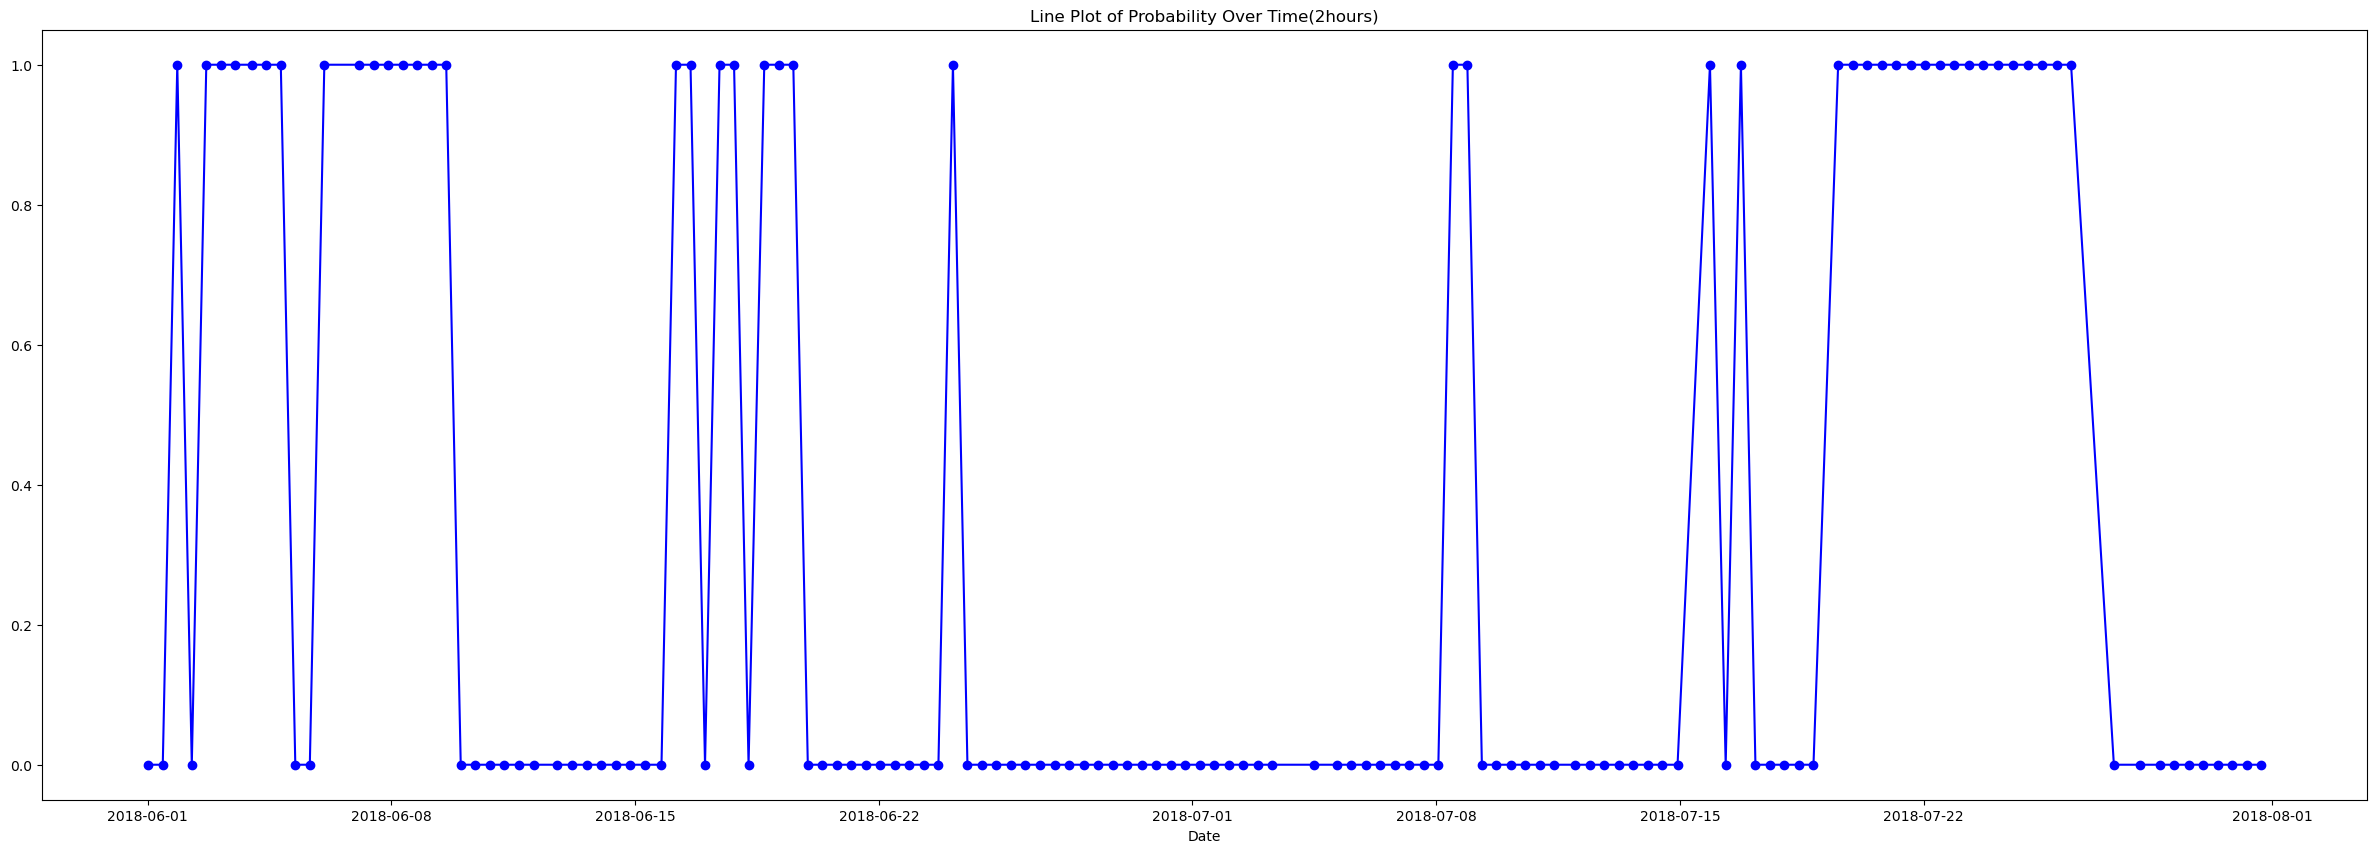

In [5]:
selected_dates = df['Date'].iloc[::60]

# Filter the DataFrame based on the selected dates
selected_data = df[df['Date'].isin(selected_dates)]

# Plotting
plt.figure(figsize=(30, 10))
plt.plot(selected_data['Date'], selected_data[ 'Channelling'], marker='o', linestyle='-', color='b')
plt.title('Line Plot of Probability Over Time(2hours)')
plt.xlabel('Date')

# RF probablity 

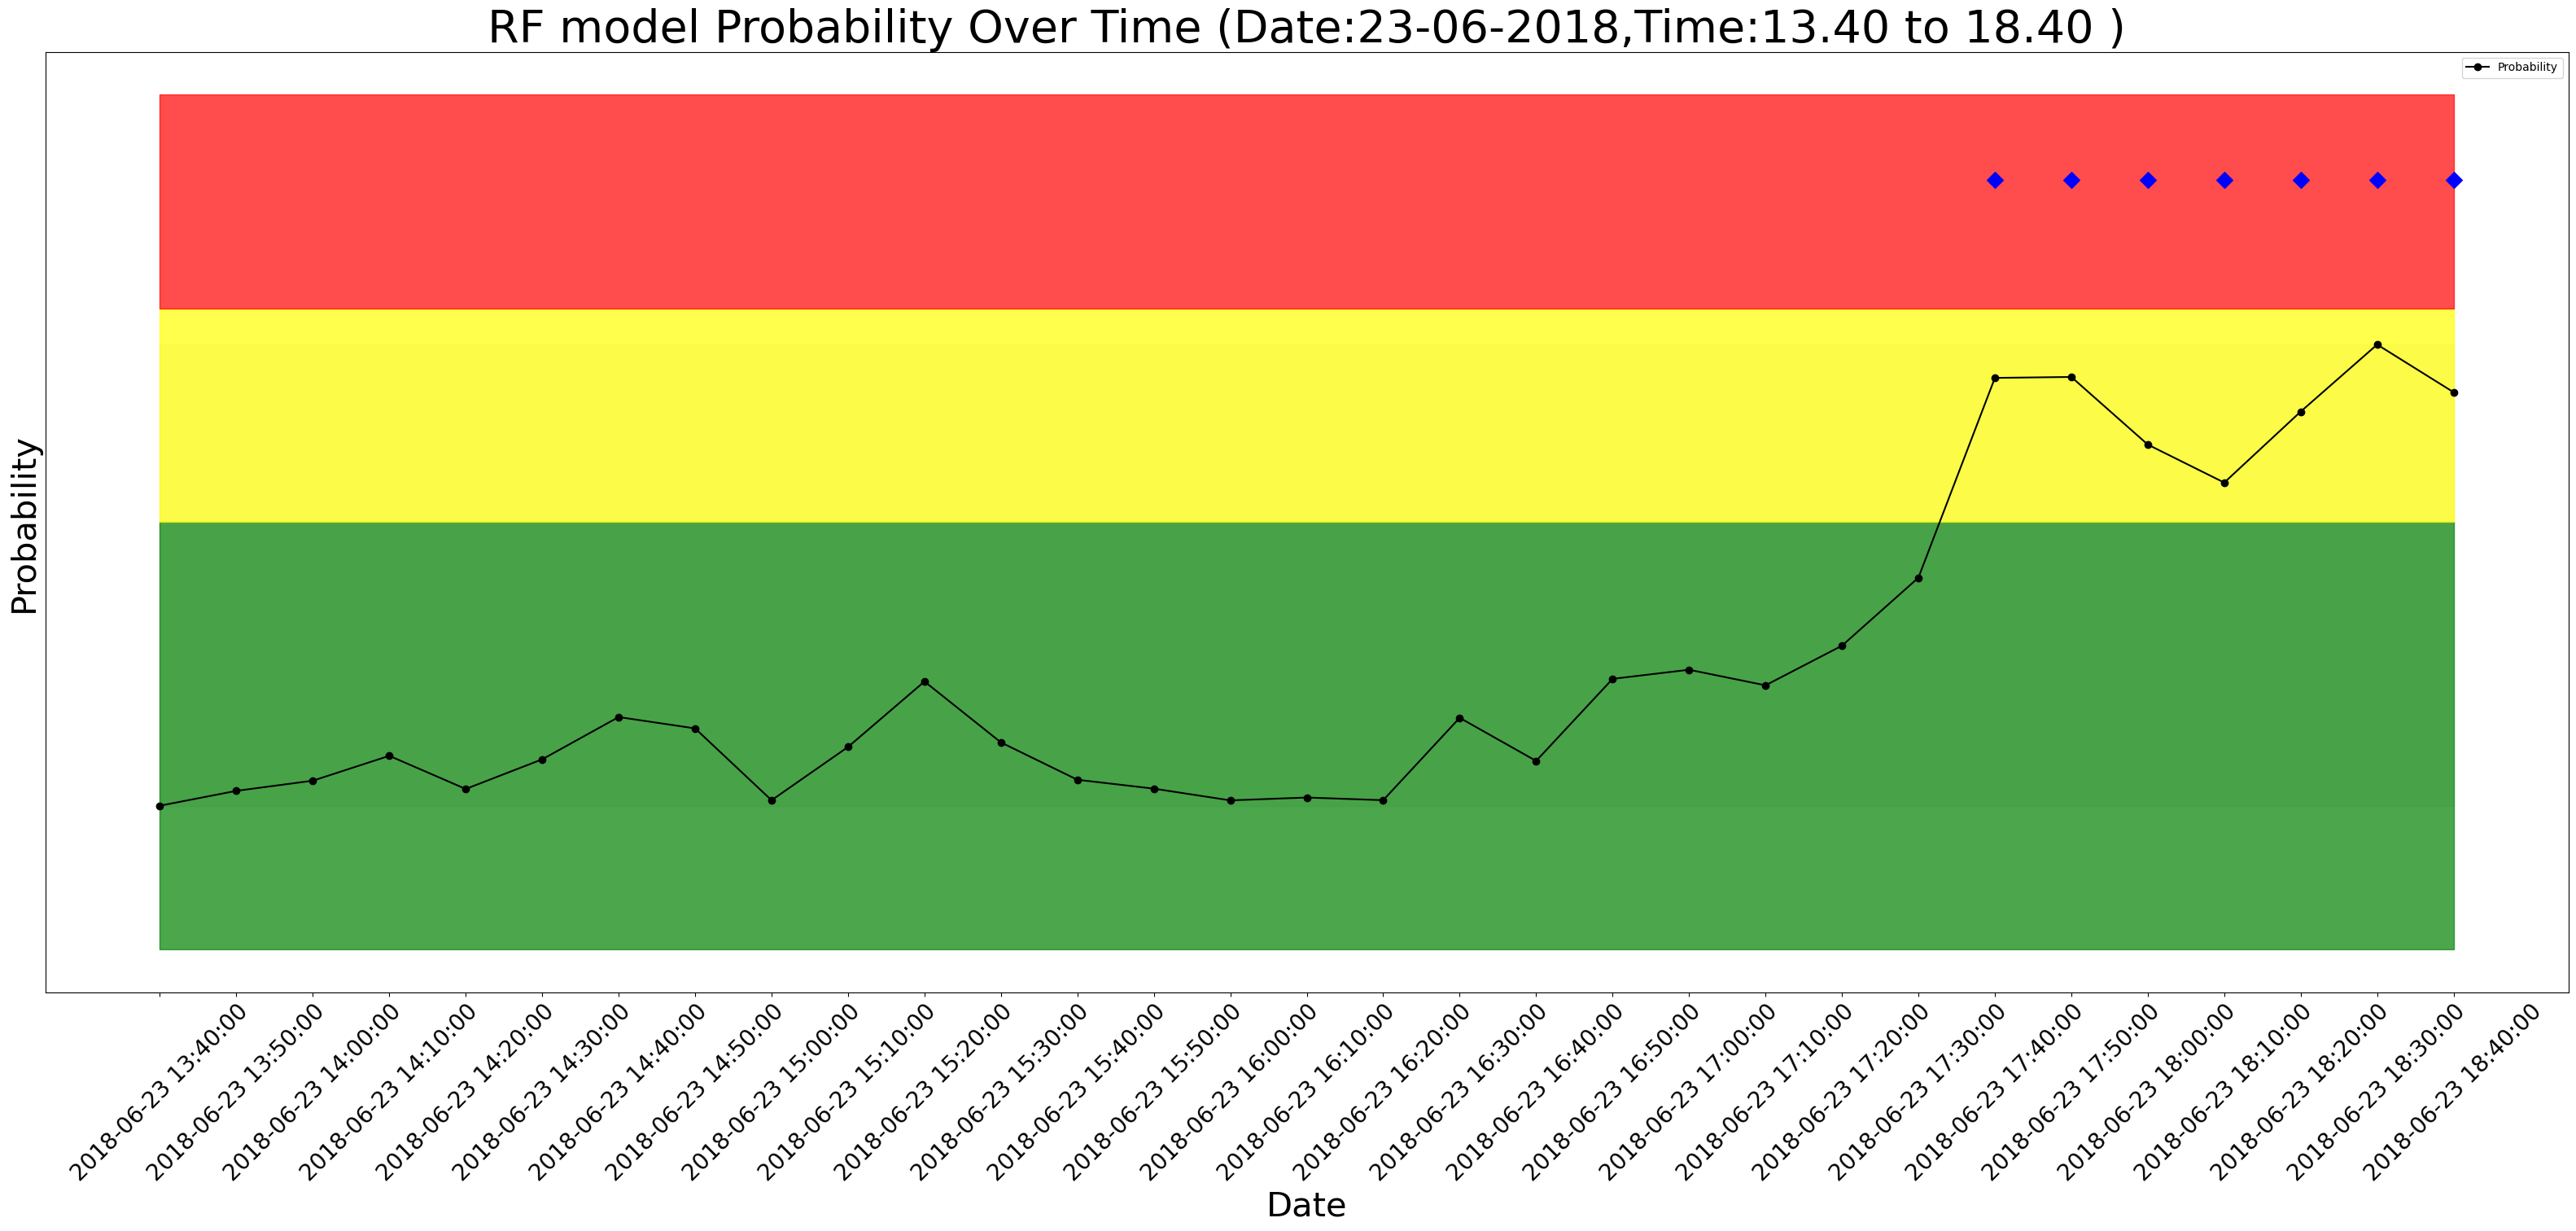

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'Date' is your date column
df['Date'] = pd.to_datetime(df['Date'])

# Select the first 12 rows
df_subset = df.iloc[3100:3131, :]

# Define color ranges and corresponding colors
color_ranges = [(0, 0.5, 'green'), (0.5, 0.75, 'yellow'), (0.75, 1.0, 'red')]

# Create a colormap based on the specified color ranges
colors = [color for _, _, color in color_ranges]
cmap = ListedColormap(colors)

# Increase the figure size and axis visibility
plt.figure(figsize=(40, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size

# Fill background with gradient color
plt.fill_between(df_subset['Date'], df_subset['Probability'].min(), df_subset['Probability'].max(), color='gray', alpha=0.1)

# Fill specific ranges with gradient color
for ymin, ymax, color in color_ranges:
    plt.fill_between(df_subset['Date'], ymin, ymax, color=color, alpha=0.7)

# Plot the line graph over the filled background
plt.plot(df_subset['Date'], df_subset['Probability'], marker='o', linestyle='-', color='black', label='Probability')

# Highlight points where Probability exceeds 0.75
for index, row in df_subset.iterrows():
    if row['Probability'] > 0.75:
        plt.scatter(row['Date'], row['Probability'], c='red', marker='o', s=100)
    if row['Channelling'] == 1:
        plt.scatter(row['Date'], 0.9, c='blue', marker='D', s=100)  # y-value set to 0.9 for visibility

plt.title('RF model Probability Over Time (Date:23-06-2018,Time:13.40 to 18.40 )', fontsize=40)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Probability', fontsize=30)

# Format x-axis ticks to include both date and time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(df_subset['Date'], rotation=45, fontsize=20)

plt.yticks([])  # Hide Y-axis labels
plt.legend(fontsize=10)
plt.show()

In [7]:
df_subset = df.iloc[3580:3620, :]

In [8]:
df_subset

,Unnamed: 0,Date,Channelling,Probability,prediction,Hot_Blast_Vol,Hot_Blast_Press,FTP,diff_pressure,Permeability,...,PT_532_535_avg,PT_532_535_std,PT_536_539_avg,PT_536_539_std,PT_Q1_std,PT_Q2_std,PT_Q3_std,PT_Q4_std,Sigmoid_Probability_New,Probability.1
3580,3730,2018-06-26 21:40:00,0,0.044856,0,350443.371847,3.031923,1.756673,1.275250,282.121263,...,2.153577,0.002831,2.235137,0.019592,0.087746,0.083570,0.084902,0.072432,0.486737,0.044856
3581,3731,2018-06-26 21:50:00,0,0.045255,0,351896.953119,3.039925,1.757094,1.282832,282.562388,...,2.164372,0.003003,2.350038,0.071868,0.114070,0.109619,0.153565,0.139418,0.503687,0.045255
3582,3732,2018-06-26 22:00:00,0,0.039107,0,352622.173414,3.035773,1.757954,1.277819,284.846600,...,2.171064,0.002711,2.243730,0.019550,0.084874,0.079573,0.083705,0.070581,0.481450,0.039107
3583,3733,2018-06-26 22:10:00,0,0.041767,0,356295.372273,3.035621,1.756509,1.279112,290.133672,...,2.172151,0.003339,2.340137,0.066871,0.108193,0.102549,0.143707,0.131928,0.496018,0.041767
3584,3734,2018-06-26 22:20:00,0,0.041229,0,356679.557543,3.012169,1.756766,1.255404,297.716245,...,2.162784,0.004337,2.222761,0.021097,0.080528,0.071083,0.078295,0.064848,0.481256,0.041229
3585,3735,2018-06-26 22:30:00,0,0.046319,0,347796.480022,3.058765,1.757827,1.300938,272.099097,...,2.179972,0.005027,2.347685,0.077659,0.108699,0.097540,0.149149,0.132891,0.488767,0.046319
3586,3736,2018-06-26 22:40:00,0,0.038684,0,353185.488253,3.076151,1.756384,1.319768,276.551727,...,2.180857,0.004479,2.236036,0.022628,0.080771,0.068751,0.079388,0.064722,0.471085,0.038684
3587,3737,2018-06-26 22:50:00,0,0.042361,0,343190.737357,3.046062,1.756456,1.289607,267.217526,...,2.168259,0.003655,2.330145,0.078143,0.104808,0.100717,0.145255,0.129082,0.498164,0.042361
3588,3738,2018-06-26 23:00:00,0,0.041438,0,341209.990682,3.045448,1.757788,1.287660,264.188523,...,2.172617,0.003351,2.223635,0.022655,0.077775,0.066947,0.078044,0.062355,0.475943,0.041438
3589,3739,2018-06-26 23:10:00,0,0.040190,0,344946.601077,3.042271,1.756006,1.286265,270.627201,...,2.179092,0.003333,2.330818,0.072690,0.102939,0.097075,0.140257,0.125632,0.496145,0.040190


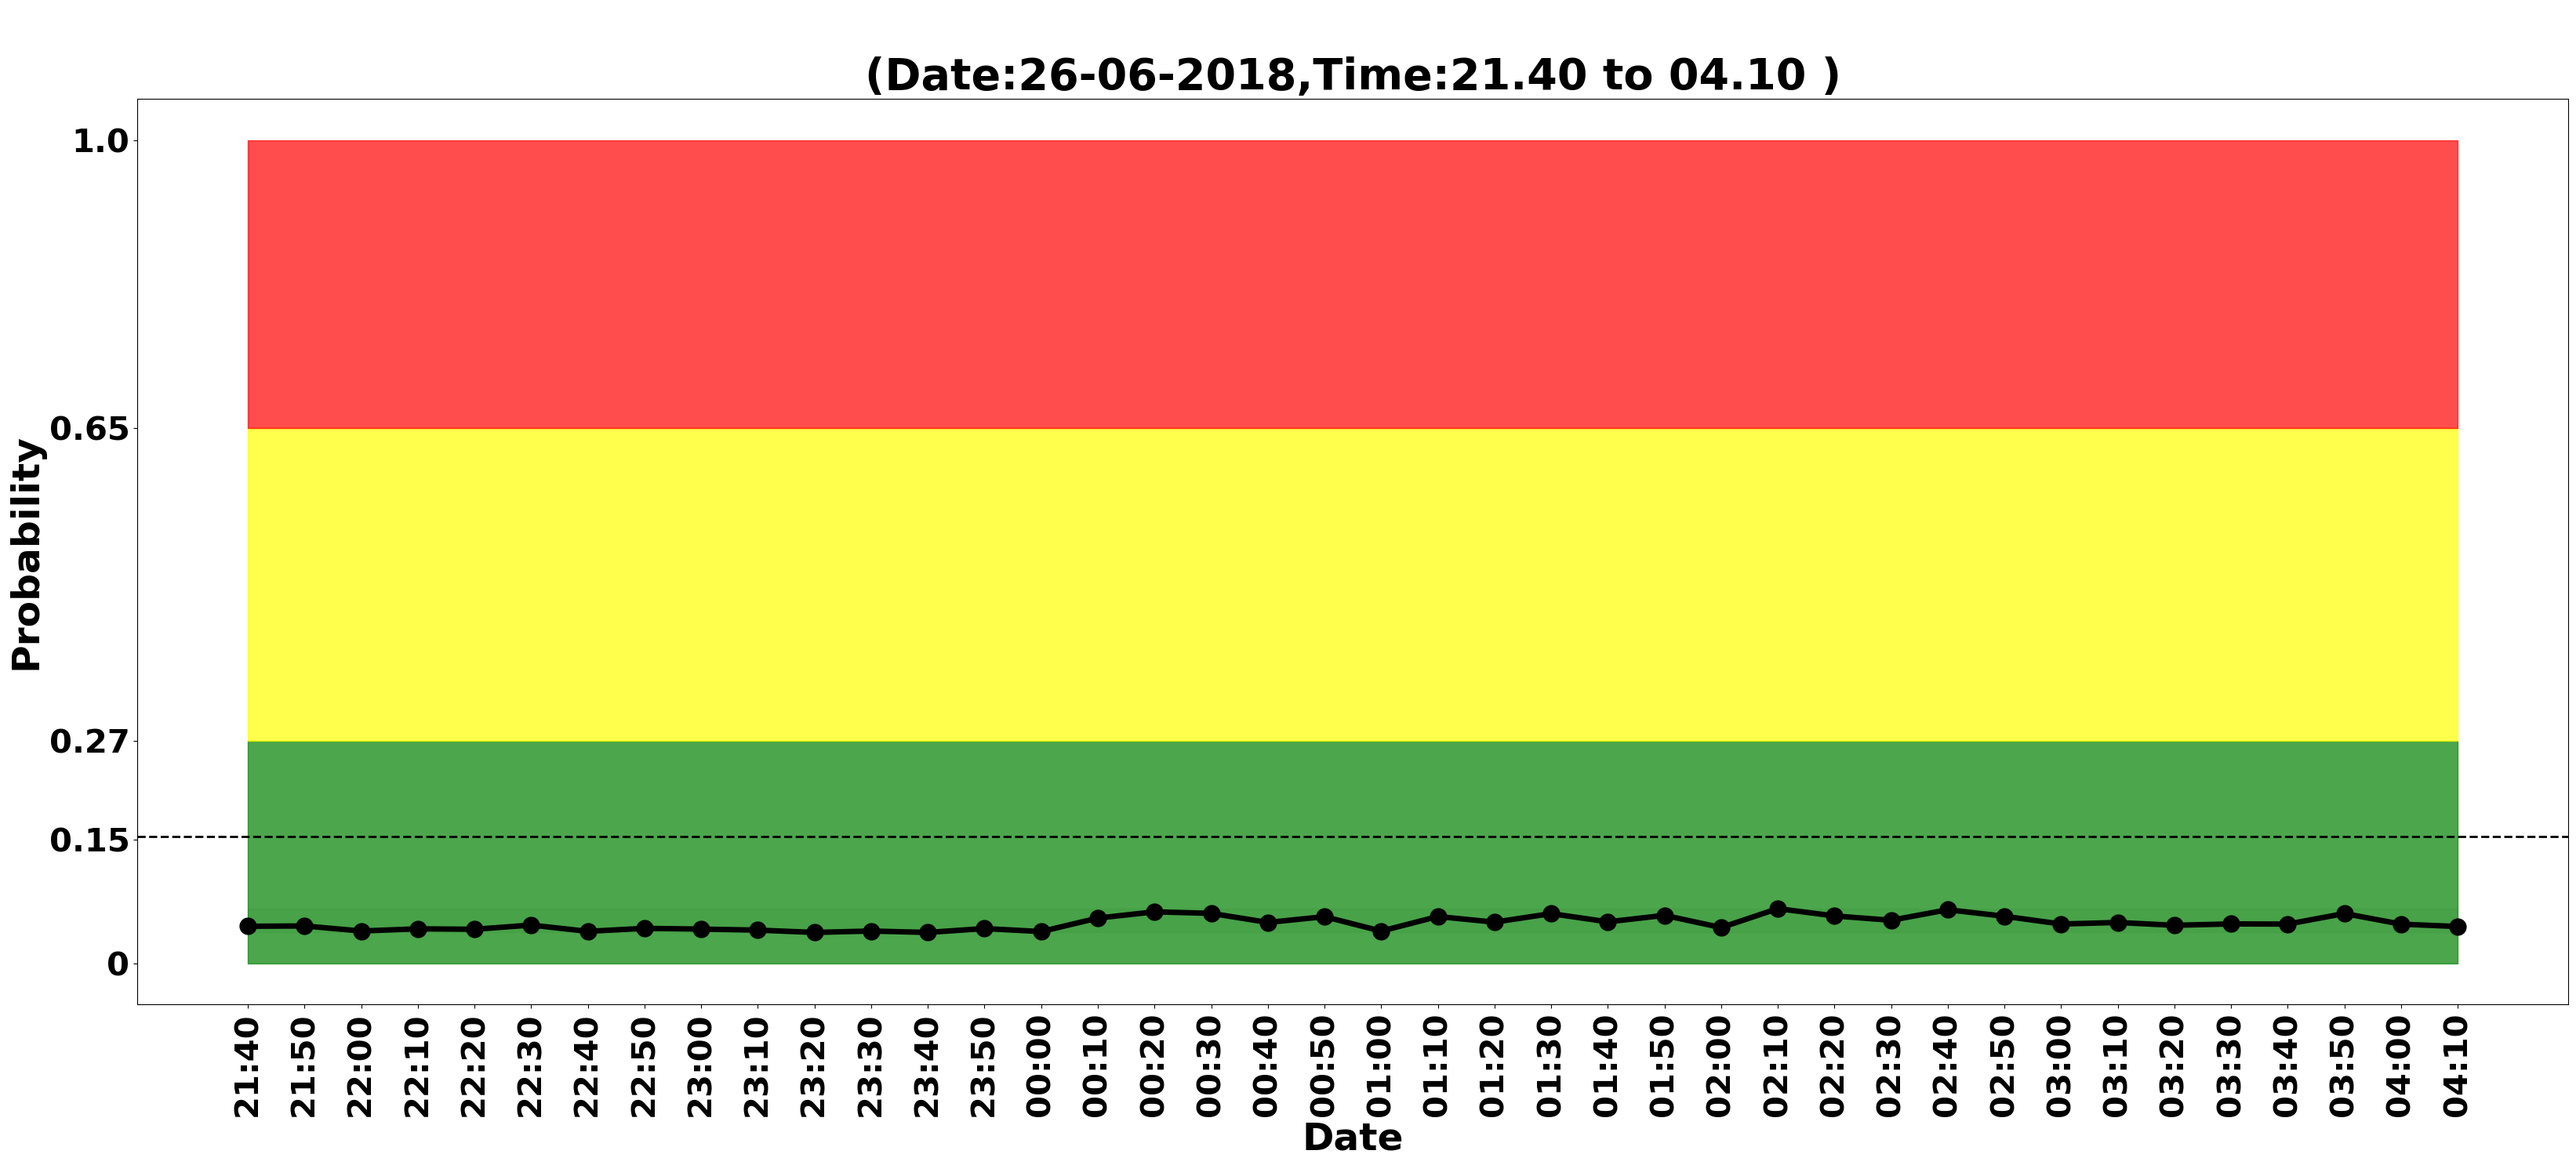

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'Date' is your date column
df['Date'] = pd.to_datetime(df['Date'])

# Select the first 12 rows
df_subset = df.iloc[3580:3620, :]

# Define color ranges and corresponding colors
color_ranges = [(0, 0.27, 'green'), (0.27, 0.65, 'yellow'), (0.65, 1.0, 'red')]
# Create a colormap based on the specified color ranges
colors = [color for _, _, color in color_ranges]
cmap = ListedColormap(colors)


# Increase the figure size and axis visibility
fig, ax = plt.subplots(figsize=(40, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size

# Fill background with gradient color
ax.fill_between(df_subset['Date'], df_subset['Probability'].min(), df_subset['Probability'].max(), color='gray', alpha=0.1)

# Fill specific ranges with gradient color
for ymin, ymax, color in color_ranges:
    ax.fill_between(df_subset['Date'], ymin, ymax, color=color, alpha=0.7)

# Plot the line graph over the filled background
ax.plot(df_subset['Date'], df_subset['Probability'], marker='o', markersize=15, linestyle='-', color='black', linewidth=5, label='Probability')
# Highlight points where Probability exceeds 0.75
for index, row in df_subset.iterrows():
    if row['Probability'] > 0.75:
        plt.scatter(row['Date'], row['Probability'], c='red', marker='o', s=100)
    if row['Channelling'] == 1:
        plt.scatter(row['Date'], 0.9, c='blue', marker='D', s=100)  # y-value set to 0.9 for visibility
        
# Add a margin line at 0.154 probability
ax.axhline(y=0.154, color='black', linestyle='--', linewidth=2, label='Margin at 0.154 Probability')

ax.set_title('\n(Date:26-06-2018,Time:21.40 to 04.10 )', fontsize=40,fontweight='bold')
ax.set_xlabel('Date', fontsize=35,fontweight='bold')
ax.set_ylabel('Probability', fontsize=35,fontweight='bold')

# Format x-axis ticks to include both date and time stacked vertically
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.tick_params(axis='x', labelsize=15)  # Adjust the label size as needed
for label in ax.get_xticklabels():
     label.set_fontweight('bold')
plt.xticks(df_subset['Date'], rotation=90, fontsize=30)

# Set the desired y-axis scale
ax.set_yticks([0, 0.15, 0.27, 0.65, 1.0])
ax.set_yticklabels([0, 0.15, 0.27, 0.65, 1.0], fontsize=30,fontweight='bold')   # Modify the list based on your desired scale

#ax.legend(fontsize=15)
plt.show()

In [10]:
df_subset

,Unnamed: 0,Date,Channelling,Probability,prediction,Hot_Blast_Vol,Hot_Blast_Press,FTP,diff_pressure,Permeability,...,PT_532_535_avg,PT_532_535_std,PT_536_539_avg,PT_536_539_std,PT_Q1_std,PT_Q2_std,PT_Q3_std,PT_Q4_std,Sigmoid_Probability_New,Probability.1
3580,3730,2018-06-26 21:40:00,0,0.044856,0,350443.371847,3.031923,1.756673,1.275250,282.121263,...,2.153577,0.002831,2.235137,0.019592,0.087746,0.083570,0.084902,0.072432,0.486737,0.044856
3581,3731,2018-06-26 21:50:00,0,0.045255,0,351896.953119,3.039925,1.757094,1.282832,282.562388,...,2.164372,0.003003,2.350038,0.071868,0.114070,0.109619,0.153565,0.139418,0.503687,0.045255
3582,3732,2018-06-26 22:00:00,0,0.039107,0,352622.173414,3.035773,1.757954,1.277819,284.846600,...,2.171064,0.002711,2.243730,0.019550,0.084874,0.079573,0.083705,0.070581,0.481450,0.039107
3583,3733,2018-06-26 22:10:00,0,0.041767,0,356295.372273,3.035621,1.756509,1.279112,290.133672,...,2.172151,0.003339,2.340137,0.066871,0.108193,0.102549,0.143707,0.131928,0.496018,0.041767
3584,3734,2018-06-26 22:20:00,0,0.041229,0,356679.557543,3.012169,1.756766,1.255404,297.716245,...,2.162784,0.004337,2.222761,0.021097,0.080528,0.071083,0.078295,0.064848,0.481256,0.041229
3585,3735,2018-06-26 22:30:00,0,0.046319,0,347796.480022,3.058765,1.757827,1.300938,272.099097,...,2.179972,0.005027,2.347685,0.077659,0.108699,0.097540,0.149149,0.132891,0.488767,0.046319
3586,3736,2018-06-26 22:40:00,0,0.038684,0,353185.488253,3.076151,1.756384,1.319768,276.551727,...,2.180857,0.004479,2.236036,0.022628,0.080771,0.068751,0.079388,0.064722,0.471085,0.038684
3587,3737,2018-06-26 22:50:00,0,0.042361,0,343190.737357,3.046062,1.756456,1.289607,267.217526,...,2.168259,0.003655,2.330145,0.078143,0.104808,0.100717,0.145255,0.129082,0.498164,0.042361
3588,3738,2018-06-26 23:00:00,0,0.041438,0,341209.990682,3.045448,1.757788,1.287660,264.188523,...,2.172617,0.003351,2.223635,0.022655,0.077775,0.066947,0.078044,0.062355,0.475943,0.041438
3589,3739,2018-06-26 23:10:00,0,0.040190,0,344946.601077,3.042271,1.756006,1.286265,270.627201,...,2.179092,0.003333,2.330818,0.072690,0.102939,0.097075,0.140257,0.125632,0.496145,0.040190


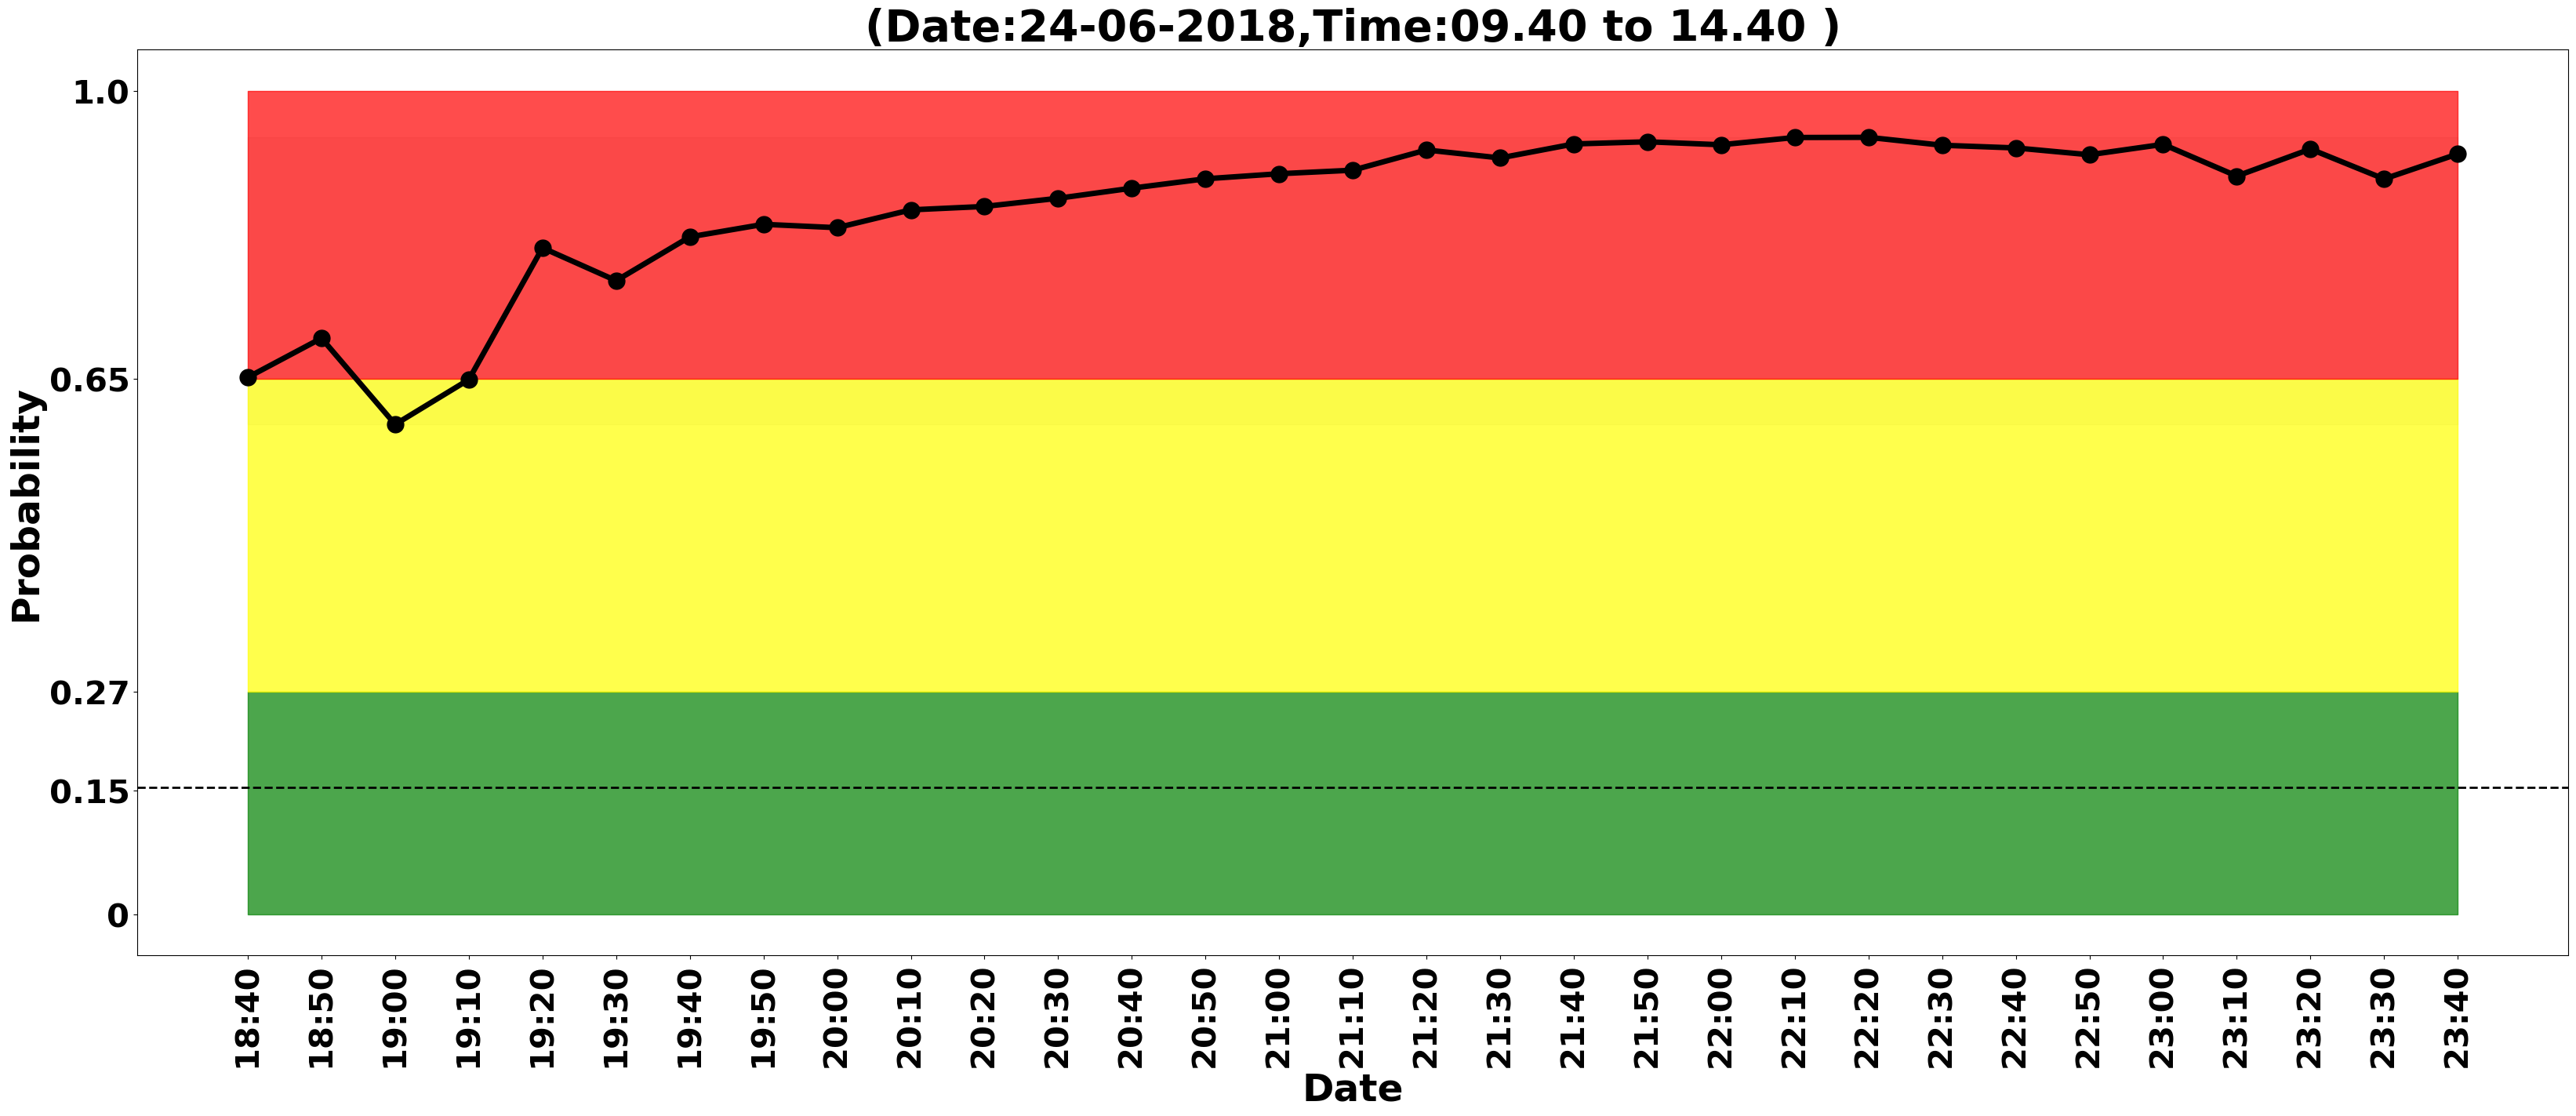

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'Date' is your date column
df['Date'] = pd.to_datetime(df['Date'])

# Select the first 12 rows
df_subset = df.iloc[3130:3161, :]

# Define color ranges and corresponding colors
color_ranges = [(0, 0.27, 'green'), (0.27, 0.65, 'yellow'), (0.65, 1.0, 'red')]
# Create a colormap based on the specified color ranges
colors = [color for _, _, color in color_ranges]
cmap = ListedColormap(colors)


# Increase the figure size and axis visibility
fig, ax = plt.subplots(figsize=(40, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size

# Fill background with gradient color
ax.fill_between(df_subset['Date'], df_subset['Probability'].min(), df_subset['Probability'].max(), color='gray', alpha=0.1)

# Fill specific ranges with gradient color
for ymin, ymax, color in color_ranges:
    ax.fill_between(df_subset['Date'], ymin, ymax, color=color, alpha=0.7)

# Plot the line graph over the filled background
ax.plot(df_subset['Date'], df_subset['Probability'], marker='o', markersize=15, linestyle='-', color='black', linewidth=5, label='Probability')
# Highlight points where Probability exceeds 0.75
#for index, row in df_subset.iterrows():
    #if row['Probability'] > 0.657:
        #ax.scatter(row['Date'], row['Probability'], c='red', marker='o', s=300)
    #if row['Channelling'] == 1:
        #ax.scatter(row['Date'], 0.9, c='blue', marker='D', s=300)  # y-value set to 0.9 for visibility
# Add a margin line at 0.154 probability
ax.axhline(y=0.154, color='black', linestyle='--', linewidth=2, label='Margin at 0.154 Probability')

ax.set_title('(Date:24-06-2018,Time:09.40 to 14.40 )', fontsize=40,fontweight='bold')
ax.set_xlabel('Date', fontsize=35,fontweight='bold')
ax.set_ylabel('Probability', fontsize=35,fontweight='bold')

# Format x-axis ticks to include both date and time stacked vertically
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.tick_params(axis='x', labelsize=15)  # Adjust the label size as needed
for label in ax.get_xticklabels():
     label.set_fontweight('bold')
plt.xticks(df_subset['Date'], rotation=90, fontsize=30)

# Set the desired y-axis scale
ax.set_yticks([0, 0.15, 0.27, 0.65, 1.0])
ax.set_yticklabels([0, 0.15, 0.27, 0.65, 1.0], fontsize=30,fontweight='bold')   # Modify the list based on your desired scale

#ax.legend(fontsize=15)
plt.show()

In [12]:
df

,Unnamed: 0,Date,Channelling,Probability,prediction,Hot_Blast_Vol,Hot_Blast_Press,FTP,diff_pressure,Permeability,...,PT_532_535_avg,PT_532_535_std,PT_536_539_avg,PT_536_539_std,PT_Q1_std,PT_Q2_std,PT_Q3_std,PT_Q4_std,Sigmoid_Probability_New,Probability.1
0,0,2018-06-01 00:00:00,0,0.251647,0,291314.141460,2.358719,1.305764,1.052955,243.857836,...,1.825356,0.042057,1.884097,0.029293,0.120956,0.145853,0.424997,0.164929,0.498888,0.251647
1,1,2018-06-01 00:10:00,0,0.230208,0,296994.243475,2.465952,1.308096,1.157856,230.175993,...,1.893880,0.042830,2.050559,0.079464,0.210011,0.157428,0.425095,0.255437,0.507623,0.230208
2,2,2018-06-01 00:20:00,0,0.230512,0,327925.318529,2.829154,1.589956,1.239198,256.979853,...,2.213217,0.033533,2.267714,0.025628,0.173254,0.153403,0.516554,0.194810,0.489689,0.230512
3,3,2018-06-01 00:30:00,0,0.249272,0,334864.588813,2.947168,1.671134,1.276034,258.477732,...,2.300787,0.029457,2.454911,0.069623,0.204915,0.177879,0.510954,0.249852,0.512057,0.249272
4,4,2018-06-01 00:40:00,0,0.289162,0,336993.350112,2.956800,1.667515,1.289285,259.065547,...,2.302855,0.035536,2.384792,0.024281,0.188738,0.183612,0.470688,0.194931,0.507213,0.289162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8139,8779,2018-07-31 23:10:00,0,0.128463,0,380426.550979,3.273984,1.888153,1.385831,259.060490,...,2.303579,0.051926,2.378991,0.046582,0.119865,0.071776,0.067249,0.101154,0.485765,0.128463
8140,8780,2018-07-31 23:20:00,0,0.134660,0,379231.369970,3.279995,1.887348,1.392646,258.301497,...,2.296144,0.041760,2.358549,0.066698,0.127016,0.067461,0.067526,0.065408,0.485991,0.134660
8141,8781,2018-07-31 23:30:00,0,0.265717,0,357639.016884,3.238955,1.883534,1.355421,232.754575,...,2.283660,0.052130,2.348265,0.037154,0.110286,0.069805,0.065529,0.097700,0.495464,0.265717
8142,8782,2018-07-31 23:40:00,0,0.190400,0,361061.608012,3.235317,1.880723,1.354594,237.578259,...,2.289523,0.082556,2.308483,0.040469,0.127695,0.064494,0.064060,0.061886,0.492085,0.190400


In [13]:
xyz

NameError: name 'xyz' is not defined

# Probablity test over hourly data of OCT -2023

In [14]:
dk = pd.read_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\OCT2023_10min_probablity_1.xlsx')

In [15]:
dk.columns

Index(['Unnamed: 0', 'Date', 'Date2', 'Date1', 'Predicted_Channeling',
       'Channeling_Probability', 'Bottom_Diff_Press', 'ETA_CO', 'FTP',
       'Heat_loss_std', 'Middle_Diff_Press', 'PT_520_523_avg',
       'PT_520_523_std', 'PT_524_527_avg', 'PT_524_527_std', 'PT_528_531_avg',
       'PT_528_531_std', 'PT_532_535_avg', 'PT_532_535_std', 'PT_536_539_avg',
       'PT_536_539_std', 'Periphery_Temp_avg', 'Periphery_Temp_std',
       'Permeability', 'QUAD1_Heat_loss', 'QUAD2_Heat_loss', 'QUAD3_Heat_loss',
       'QUAD4_Heat_loss', 'Row10_avg', 'Row10_std', 'Row11_avg', 'Row11_std',
       'Row12_avg', 'Row12_std', 'Row13_avg', 'Row13_std', 'Row14_avg',
       'Row14_std', 'Row15_avg', 'Row15_std', 'Row16_avg', 'Row16_std',
       'Row17_avg', 'Row17_std', 'Row18_avg', 'Row18_std', 'Row19_avg',
       'Row19_std', 'Row8_avg', 'Row8_std', 'Row9_avg', 'Row9_std',
       'Top_Diff_Press', 'Total_Heat_loss', 'Uptake_tem_avg', 'Uptake_tem_std',
       'diff_pressure'],
      dtype='object')

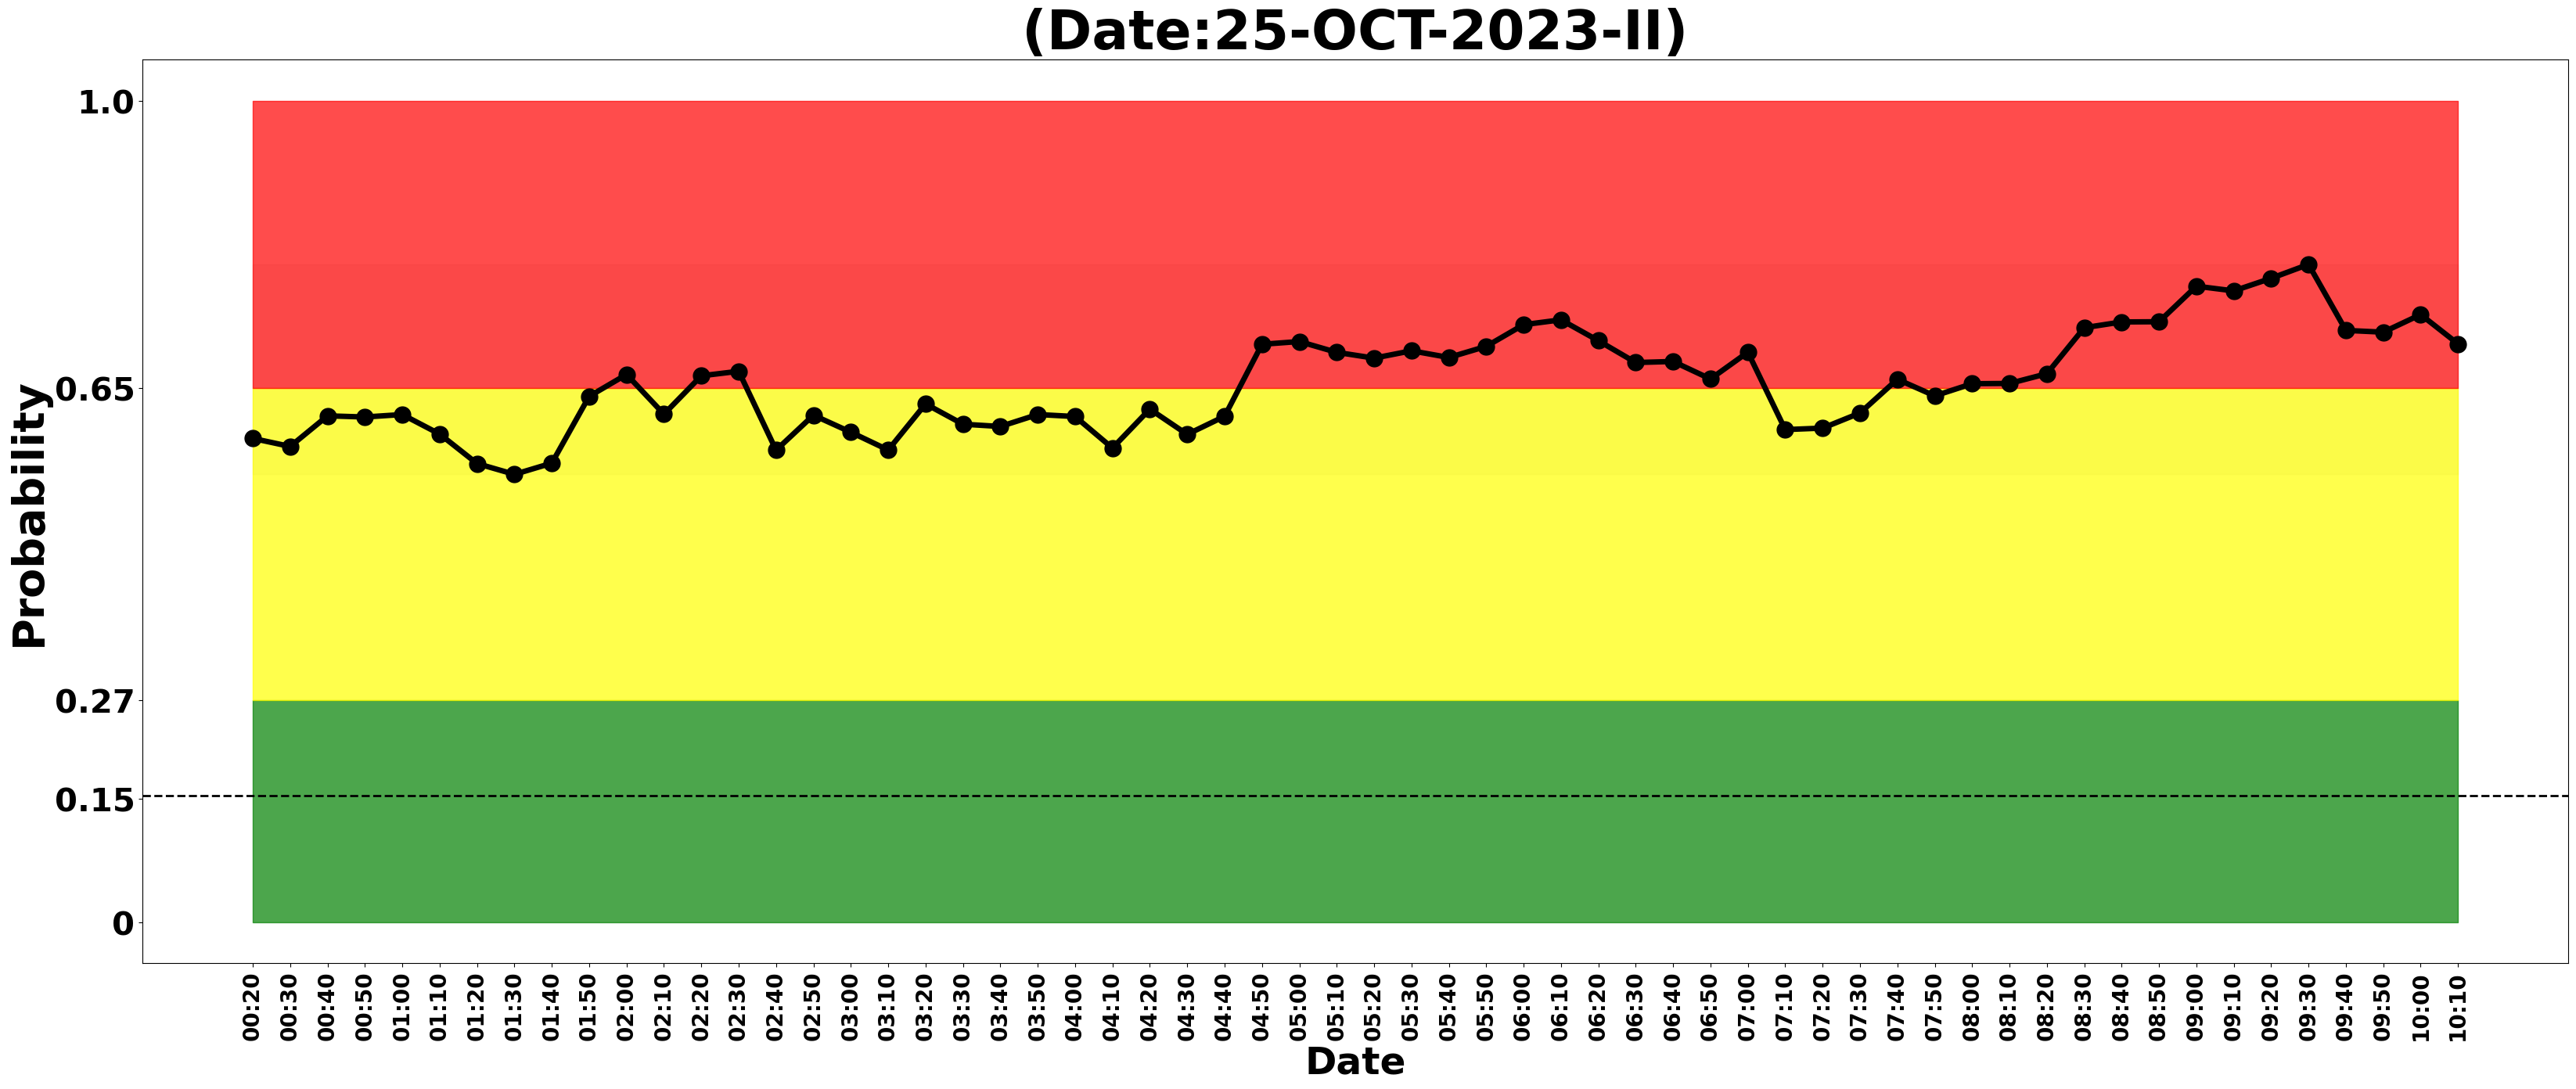

In [41]:
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'XYZ' is your date column
dk['Date'] = pd.to_datetime(dk['Date'])

# Select the first 12 rows
dk_subset = dk.iloc[3475:3535, :]

# Define color ranges and corresponding colors
color_ranges = [(0, 0.27, 'green'), (0.27, 0.65, 'yellow'), (0.65, 1.0, 'red')]
# Create a colormap based on the specified color ranges
colors = [color for _, _, color in color_ranges]
cmap = ListedColormap(colors)

# Increase the figure size and axis visibility
fig, ax = plt.subplots(figsize=(40, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size

# Fill background with gradient color
ax.fill_between(dk_subset['Date'], dk_subset['Channeling_Probability'].min(), dk_subset['Channeling_Probability'].max(), color='gray', alpha=0.1)

# Fill specific ranges with gradient color
for ymin, ymax, color in color_ranges:
    ax.fill_between(dk_subset['Date'], ymin, ymax, color=color, alpha=0.7)

# Plot the line graph over the filled background
ax.plot(dk_subset['Date'], dk_subset['Channeling_Probability'], marker='o', markersize=15, linestyle='-', color='black', linewidth=5, label='Channeling_Probability')

# Add a margin line at 0.154 probability
ax.axhline(y=0.154, color='black', linestyle='--', linewidth=2, label='Margin at 0.154 Probability')

ax.set_title('(Date:25-OCT-2023-II)', fontsize=50, fontweight='bold')
ax.set_xlabel('Date', fontsize=35, fontweight='bold')
ax.set_ylabel('Probability', fontsize=40, fontweight='bold')

# Format x-axis ticks to include both date and time stacked vertically
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.tick_params(axis='x', labelsize=15)  # Adjust the label size as needed
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
plt.xticks(dk_subset['Date'], rotation=90, fontsize=20)

# Set the desired y-axis scale
ax.set_yticks([0, 0.15, 0.27, 0.65, 1.0])
ax.set_yticklabels([0, 0.15, 0.27, 0.65, 1.0], fontsize=30, fontweight='bold')   # Modify the list based on your desired scale

# Show plot
plt.show()


In [40]:
dk_subset

,Unnamed: 0,Date,Date2,Date1,Predicted_Channeling,Channeling_Probability,Bottom_Diff_Press,ETA_CO,FTP,Heat_loss_std,...,Row19_std,Row8_avg,Row8_std,Row9_avg,Row9_std,Top_Diff_Press,Total_Heat_loss,Uptake_tem_avg,Uptake_tem_std,diff_pressure
3475,3475,2023-10-25 00:20:00,2023-10-25 00:20:00,2023-10-25 00:20:00,1,0.588751,0.945779,0.474383,1.841533,1.435671,...,103.565951,48.689554,4.148364,42.228881,10.008312,0.353366,29.997461,186.843886,19.891911,1.633775
3476,3476,2023-10-25 00:30:00,2023-10-25 00:30:00,2023-10-25 00:30:00,1,0.578963,0.966236,0.476862,1.842199,1.448646,...,103.551483,48.419294,3.977499,42.368404,10.511061,0.364029,29.911491,146.951132,11.092741,1.670926
3477,3477,2023-10-25 00:40:00,2023-10-25 00:40:00,2023-10-25 00:40:00,1,0.616237,0.919095,0.476749,1.843745,1.335763,...,103.568447,51.048287,6.018693,43.735135,12.120163,0.365429,29.602856,182.317600,11.258590,1.652309
3478,3478,2023-10-25 00:50:00,2023-10-25 00:50:00,2023-10-25 00:50:00,1,0.614830,0.895824,0.476432,1.841546,1.422755,...,103.690540,54.515611,8.664531,45.787495,13.517870,0.364358,30.066392,150.775436,11.578720,1.609110
3479,3479,2023-10-25 01:00:00,2023-10-25 01:00:00,2023-10-25 01:00:00,1,0.617830,0.908160,0.479133,1.843459,1.421456,...,103.783432,54.208882,7.877412,46.482434,13.861657,0.364656,29.011423,171.085162,13.264012,1.625180
3480,3480,2023-10-25 01:10:00,2023-10-25 01:10:00,2023-10-25 01:10:00,1,0.594054,0.835836,0.477763,1.841352,2.365119,...,104.028459,54.572950,7.624872,47.173204,14.419713,0.365197,31.699398,215.272109,20.021517,1.621686
3481,3481,2023-10-25 01:20:00,2023-10-25 01:20:00,2023-10-25 01:20:00,1,0.558155,0.800018,0.479001,1.836208,2.984328,...,104.383970,54.321365,8.494419,45.919623,14.369241,0.365261,32.191580,161.038697,13.930081,1.575177
3482,3482,2023-10-25 01:30:00,2023-10-25 01:30:00,2023-10-25 01:30:00,1,0.545014,0.859231,0.475244,1.847549,3.827300,...,104.470558,53.894029,8.433088,45.929309,15.215266,0.367600,35.072804,185.562654,18.514438,1.576689
3483,3483,2023-10-25 01:40:00,2023-10-25 01:40:00,2023-10-25 01:40:00,1,0.558647,0.882285,0.472589,1.827967,2.946383,...,104.516438,53.226233,7.795644,45.559223,16.519359,0.352454,34.264105,187.198690,19.889709,1.557084
3484,3484,2023-10-25 01:50:00,2023-10-25 01:50:00,2023-10-25 01:50:00,1,0.639982,0.911950,0.478411,1.837844,2.457226,...,104.582943,52.864817,7.538669,44.466215,14.495622,0.338642,31.385290,172.733631,15.084904,1.543411


# Total heat loss

In [ ]:
df_subset = df.iloc[3580:3620, :]

# Define color ranges and corresponding colors
color_ranges = [(15, 28, 'green'), (28, 40, 'red')]

# Create a colormap based on the specified color ranges
colors = [color for _, _, color in color_ranges]
cmap = ListedColormap(colors)

# Normalize the y-axis values to map them to the colormap
norm = plt.Normalize(df_subset['Total_Heat_loss'].min(), df_subset['Total_Heat_loss'].max())

# Increase the figure size and axis visibility
plt.figure(figsize=(40, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size

# Fill background with gradient color
plt.fill_between(df_subset['Date'], df_subset['Total_Heat_loss'].min(), df_subset['Total_Heat_loss'].max(), color='gray', alpha=0.1)

# Fill specific ranges with gradient color
for ymin, ymax, color in color_ranges:
    plt.fill_between(df_subset['Date'], ymin, ymax, color=color, alpha=0.7)

# Plot the line graph over the filled background
plt.plot(df_subset['Date'], df_subset['Total_Heat_loss'],  marker='o', markersize=15, linestyle='-', color='black', linewidth=5, label='Total_Heat_loss')

plt.title('\n(Date:26-06-2018,Time:21.40 to 04.10 )', fontsize=40,fontweight='bold')

plt.xlabel('\nDate', fontsize=35,fontweight='bold')
plt.ylabel('Total_Heat_loss', fontsize=35,fontweight='bold')

# Format x-axis ticks to include both date and time
plt.xticks(df_subset['Date'], [dt.strftime('%H:%M') for dt in df_subset['Date']], rotation=90, fontsize=30,fontweight='bold')

plt.yticks(fontsize=30)  # Increase y-axis tick font size
#plt.legend(fontsize=20)
plt.show()

# Uptake temp avg

In [ ]:
df_subset = df.iloc[3580:3620, :]

# Define color ranges and corresponding colors
color_ranges = [(80, 200, 'green'), (200, 300, 'red')]

# Create a colormap based on the specified color ranges
colors = [color for _, _, color in color_ranges]
cmap = ListedColormap(colors)

# Normalize the y-axis values to map them to the colormap
norm = plt.Normalize(df_subset['Uptake_tem_avg'].min(), df_subset['Uptake_tem_avg'].max())

# Increase the figure size and axis visibility
plt.figure(figsize=(40, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size

# Fill background with gradient color
plt.fill_between(df_subset['Date'], df_subset['Uptake_tem_avg'].min(), df_subset['Uptake_tem_avg'].max(), color='gray', alpha=0.1)

# Fill specific ranges with gradient color
for ymin, ymax, color in color_ranges:
    plt.fill_between(df_subset['Date'], ymin, ymax, color=color, alpha=0.7)

# Plot the line graph over the filled background
plt.plot(df_subset['Date'], df_subset['Uptake_tem_avg'],   marker='o', markersize=15, linestyle='-', color='black', linewidth=5, label='Uptake_tem_avg')

plt.title('\n(Date:26-06-2018,Time:21.40 to 04.10 )', fontsize=40,fontweight='bold')
plt.xlabel('\nDate', fontsize=35,fontweight='bold')
plt.ylabel('\n\nUptake_temp_avg', fontsize=35,fontweight='bold')

# Format x-axis ticks to include both date and time
plt.xticks(df_subset['Date'], [dt.strftime('%H:%M') for dt in df_subset['Date']], rotation=90, fontsize=30,fontweight='bold')       

plt.yticks(fontsize=30)  # Increase y-axis tick font size
#plt.legend(fontsize=20)
plt.show()

# periphery avg temp

In [ ]:
df_subset = df.iloc[3580:3620, :]

# Define color ranges and corresponding colors
color_ranges = [(130, 190, 'green'), (190, 260, 'red')]

# Create a colormap based on the specified color ranges
#colors = [color for _, _, color in color_ranges]
#cmap = ListedColormap(colors)

# Normalize the y-axis values to map them to the colormap
norm = plt.Normalize(df_subset[ 'Periphery_Temp_avg'].min(), df_subset[ 'Periphery_Temp_avg'].max())

# Increase the figure size and axis visibility
plt.figure(figsize=(40, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size

# Fill background with gradient color
plt.fill_between(df_subset['Date'], df_subset[ 'Periphery_Temp_avg'].min(), df_subset[ 'Periphery_Temp_avg'].max(), color='gray', alpha=0.1)

# Fill specific ranges with gradient color
for ymin, ymax, color in color_ranges:
    plt.fill_between(df_subset['Date'], ymin, ymax, color=color, alpha=0.7)

# Plot the line graph over the filled background
plt.plot(df_subset['Date'], df_subset[ 'Periphery_Temp_avg'],   marker='o', markersize=15, linestyle='-', color='black', linewidth=5, label='Uptake_tem_avg')

plt.title('(Date: 26-06-2018, Time: 21:40 to 04:10)', fontsize=40,fontweight='bold')
plt.xlabel('\nDate', fontsize=35,fontweight='bold')
plt.ylabel('Periphery_Temp_avg', fontsize=35,fontweight='bold')

# Format x-axis ticks to include both date and time
plt.xticks(df_subset['Date'], [dt.strftime('%H:%M') for dt in df_subset['Date']], rotation=90, fontsize=30,fontweight='bold')       

plt.yticks(fontsize=30,fontweight='bold')  # Increase y-axis tick font size
#plt.legend(fontsize=20)
plt.show()

In [ ]:
df.columns

# ETA CO

In [ ]:
df_subset = df.iloc[2800:2850, :]

# Define color ranges and corresponding colors
color_ranges = [(0.38, 0.45, 'red'), (0.45, 0.47, 'yellow'), (0.47, 0.48, 'green')]

# Create a colormap based on the specified color ranges
colors = [color for _, _, color in color_ranges]
cmap = ListedColormap(colors)

# Normalize the y-axis values to map them to the colormap
norm = plt.Normalize(df_subset['ETA_CO'].min(), df_subset['ETA_CO'].max())

# Increase the figure size and axis visibility
plt.figure(figsize=(40, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size

# Fill background with gradient color
plt.fill_between(df_subset['Date'], df_subset['ETA_CO'].min(), df_subset['ETA_CO'].max(), color='gray', alpha=0.1)

# Fill specific ranges with gradient color
for ymin, ymax, color in color_ranges:
    plt.fill_between(df_subset['Date'], ymin, ymax, color=color, alpha=0.7)

# Plot the line graph over the filled background
plt.plot(df_subset['Date'], df_subset['ETA_CO'], marker='o', linestyle='-', color='black', label='ETA_CO')

plt.title('ETA_CO Over Time (0:61)', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.ylabel('ETA_CO', fontsize=30)

# Format x-axis ticks to include both date and time
plt.xticks(df_subset['Date'], [dt.strftime('%Y-%m-%d %H:%M:%S') for dt in df_subset['Date']], rotation=45, fontsize=20)

plt.yticks(fontsize=30)  # Increase y-axis tick font size
plt.legend(fontsize=20)
plt.show()

# quardantwise heat loss

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Assuming 'Date' is your date column
df['Date'] = pd.to_datetime(df['Date'])

# Select the first 12 rows
df_subset = df.iloc[3580:3620, :]

# Plot all the lines in a single graph
plt.figure(figsize=(40, 15))

plt.plot(df_subset['Date'], df_subset['QUAD1_Heat_loss'], label='QUAD1', linestyle='-', marker='o', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset['QUAD2_Heat_loss'], label='QUAD2', linestyle='--', marker='s', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset['QUAD3_Heat_loss'], label='QUAD3', linestyle='-.', marker='^', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset['QUAD4_Heat_loss'], label='QUAD4', linestyle=':', marker='d', markersize=15, linewidth=5)

# Set y-axis limits
plt.ylim(0, 14)

plt.title('\n(Date: 26-06-2018, Time: 21:40 to 04:10)', fontsize=40, fontweight='bold')

plt.xticks(df_subset['Date'], [dt.strftime('%H:%M') for dt in df_subset['Date']], rotation=90, fontsize=30, fontweight='bold')       

plt.ylabel('\nQuadrant-wise Heat Loss', fontsize=35, fontweight='bold')
plt.xlabel('\nDate', fontsize=35, fontweight='bold')
plt.legend()
plt.yticks(fontsize=30, fontweight='bold')

plt.show()


# row temp 08 to 12

In [15]:
df.columns

Index(['Unnamed: 0', 'Date', 'Channelling', 'Probability', 'prediction',
       'Hot_Blast_Vol', 'Hot_Blast_Press', 'FTP', 'diff_pressure',
       'Permeability', 'Top_Diff_Press', 'Middle_Diff_Press',
       'Bottom_Diff_Press', 'ETA_CO', 'HM_PROD_RATE', 'QUAD1_Heat_loss',
       'QUAD2_Heat_loss', 'QUAD3_Heat_loss', 'QUAD4_Heat_loss',
       'Total_Heat_loss', 'Heat_loss_std', 'Periphery_Temp_avg',
       'Periphery_Temp_std', 'Uptake_tem_avg', 'Uptake_tem_std', 'Row8_avg',
       'Row8_std', 'Row9_avg', 'Row9_std', 'Row10_avg', 'Row10_std',
       'Row11_avg', 'Row11_std', 'Row12_avg', 'Row12_std', 'Row13_avg',
       'Row13_std', 'Row14_avg', 'Row14_std', 'Row15_avg', 'Row15_std',
       'Row16_avg', 'Row16_std', 'Row17_avg', 'Row17_std', 'Row18_avg',
       'Row18_std', 'Row19_avg', 'Row19_std', 'PT_520_523_avg',
       'PT_520_523_std', 'PT_524_527_avg', 'PT_524_527_std', 'PT_528_531_avg',
       'PT_528_531_std', 'PT_532_535_avg', 'PT_532_535_std', 'PT_536_539_avg',
       'PT_5

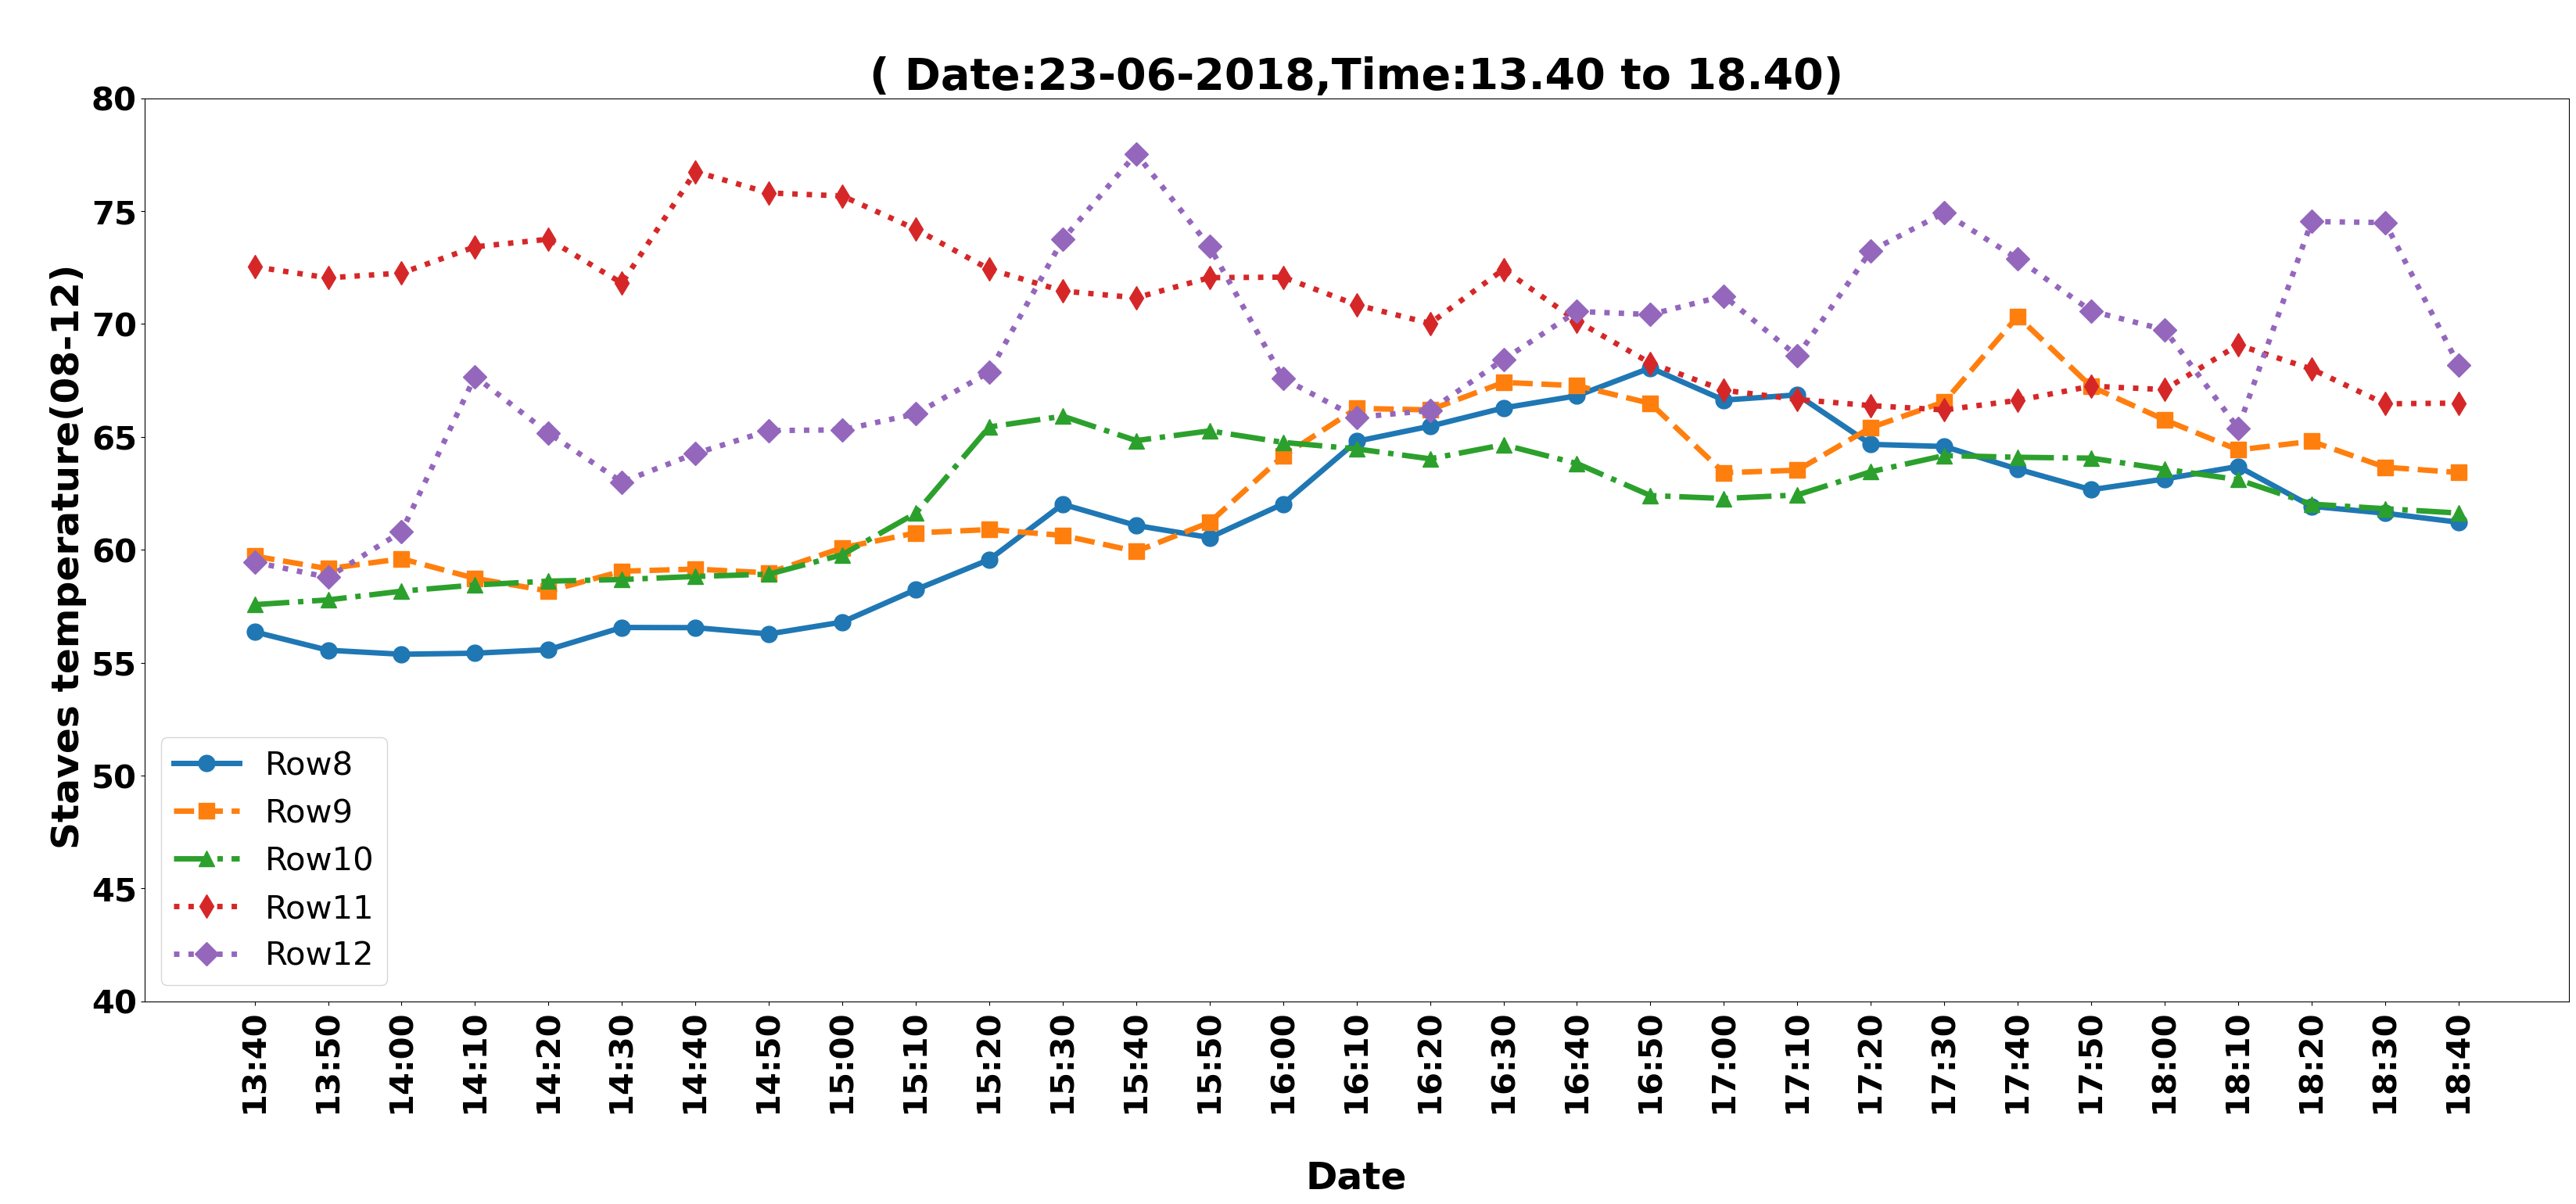

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Assuming 'Date' is your date column
df['Date'] = pd.to_datetime(df['Date'])

# Select the first 12 rows
df_subset = df.iloc[3100:3131, :]

# Plot all the lines in a single graph
plt.figure(figsize=(40, 15))

plt.plot(df_subset['Date'], df_subset[ 'Row8_avg'], label='Row8', linestyle='-', marker='o', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset[ 'Row9_avg'], label='Row9', linestyle='--', marker='s', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset[ 'Row10_avg'], label='Row10', linestyle='-.', marker='^', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset[ 'Row11_avg'], label='Row11', linestyle=':', marker='d', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset[ 'Row12_avg'], label='Row12', linestyle=':', marker='D', markersize=15, linewidth=5)
# Set y-axis limits
plt.ylim(40, 80)

plt.title('\n( Date:23-06-2018,Time:13.40 to 18.40)', fontsize=40, fontweight='bold')

plt.xticks(df_subset['Date'], [dt.strftime('%H:%M') for dt in df_subset['Date']], rotation=90, fontsize=30, fontweight='bold')       

plt.ylabel('\nStaves temperature(08-12) ', fontsize=35, fontweight='bold')
plt.xlabel('\nDate', fontsize=35, fontweight='bold')
plt.legend(fontsize=30)
plt.yticks(fontsize=30, fontweight='bold')

plt.show()


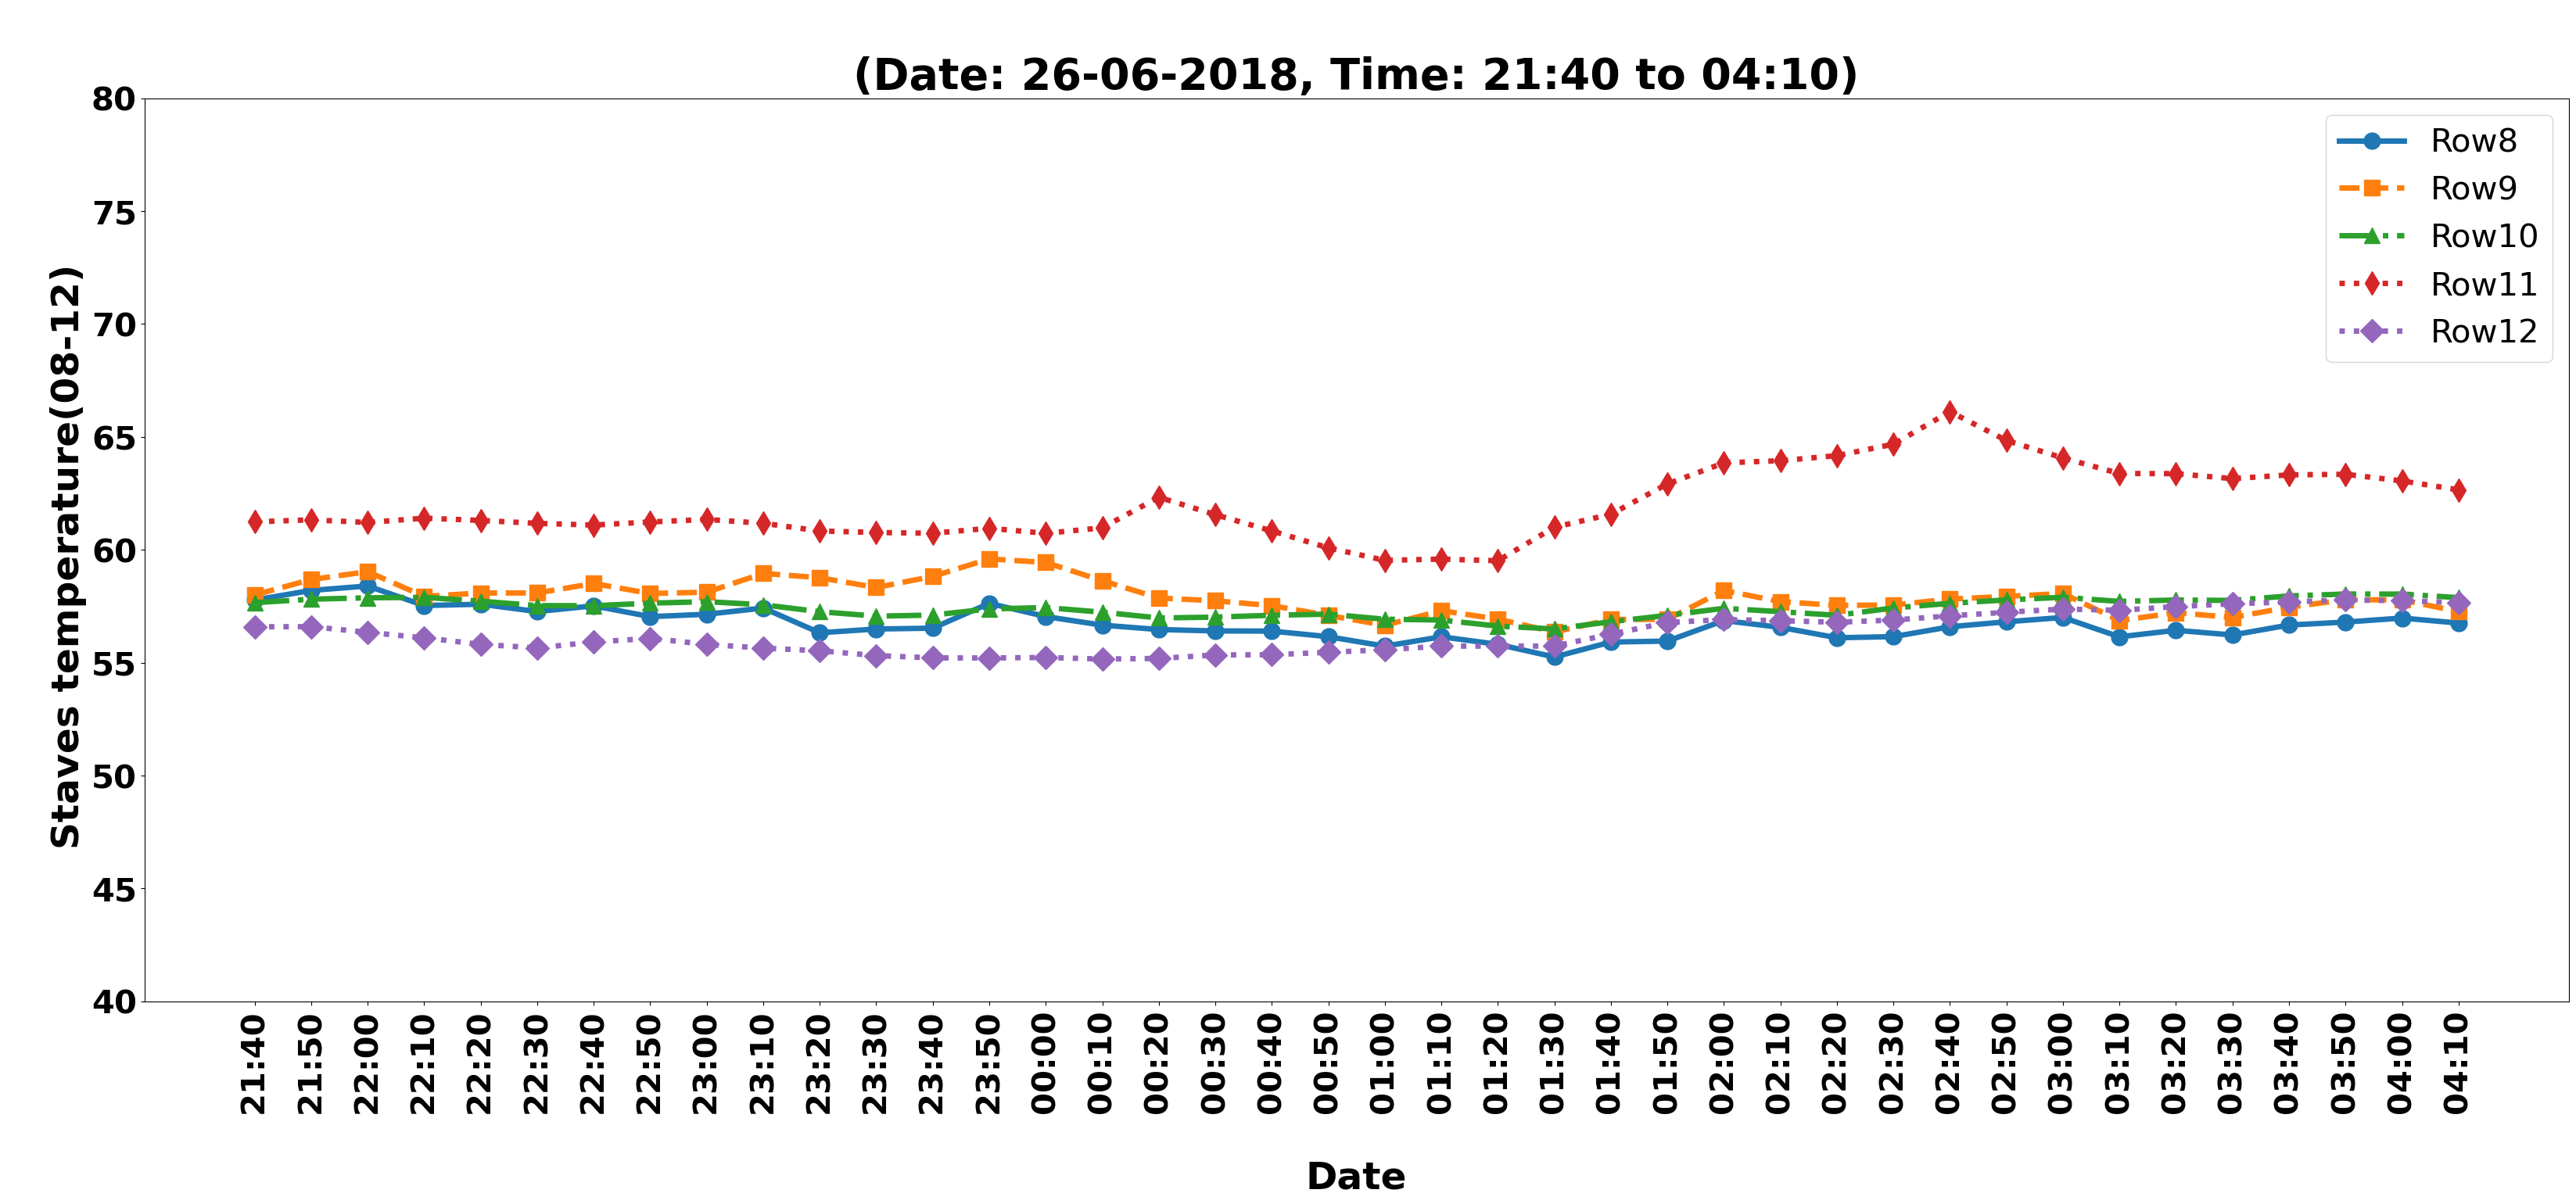

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Assuming 'Date' is your date column
df['Date'] = pd.to_datetime(df['Date'])

# Select the first 12 rows
df_subset = df.iloc[3580:3620, :]

# Plot all the lines in a single graph
plt.figure(figsize=(40, 15))

plt.plot(df_subset['Date'], df_subset[ 'Row8_avg'], label='Row8', linestyle='-', marker='o', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset[ 'Row9_avg'], label='Row9', linestyle='--', marker='s', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset[ 'Row10_avg'], label='Row10', linestyle='-.', marker='^', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset[ 'Row11_avg'], label='Row11', linestyle=':', marker='d', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset[ 'Row12_avg'], label='Row12', linestyle=':', marker='D', markersize=15, linewidth=5)

# Set y-axis limits
plt.ylim(40, 80)

plt.title('\n(Date: 26-06-2018, Time: 21:40 to 04:10)', fontsize=40, fontweight='bold')

plt.xticks(df_subset['Date'], [dt.strftime('%H:%M') for dt in df_subset['Date']], rotation=90, fontsize=30, fontweight='bold')       

plt.ylabel('\nStaves temperature(08-12) ', fontsize=35, fontweight='bold')
plt.xlabel('\nDate', fontsize=35, fontweight='bold')
plt.legend(fontsize=30)
plt.yticks(fontsize=30, fontweight='bold')

plt.show()


# row temp 13 to 18

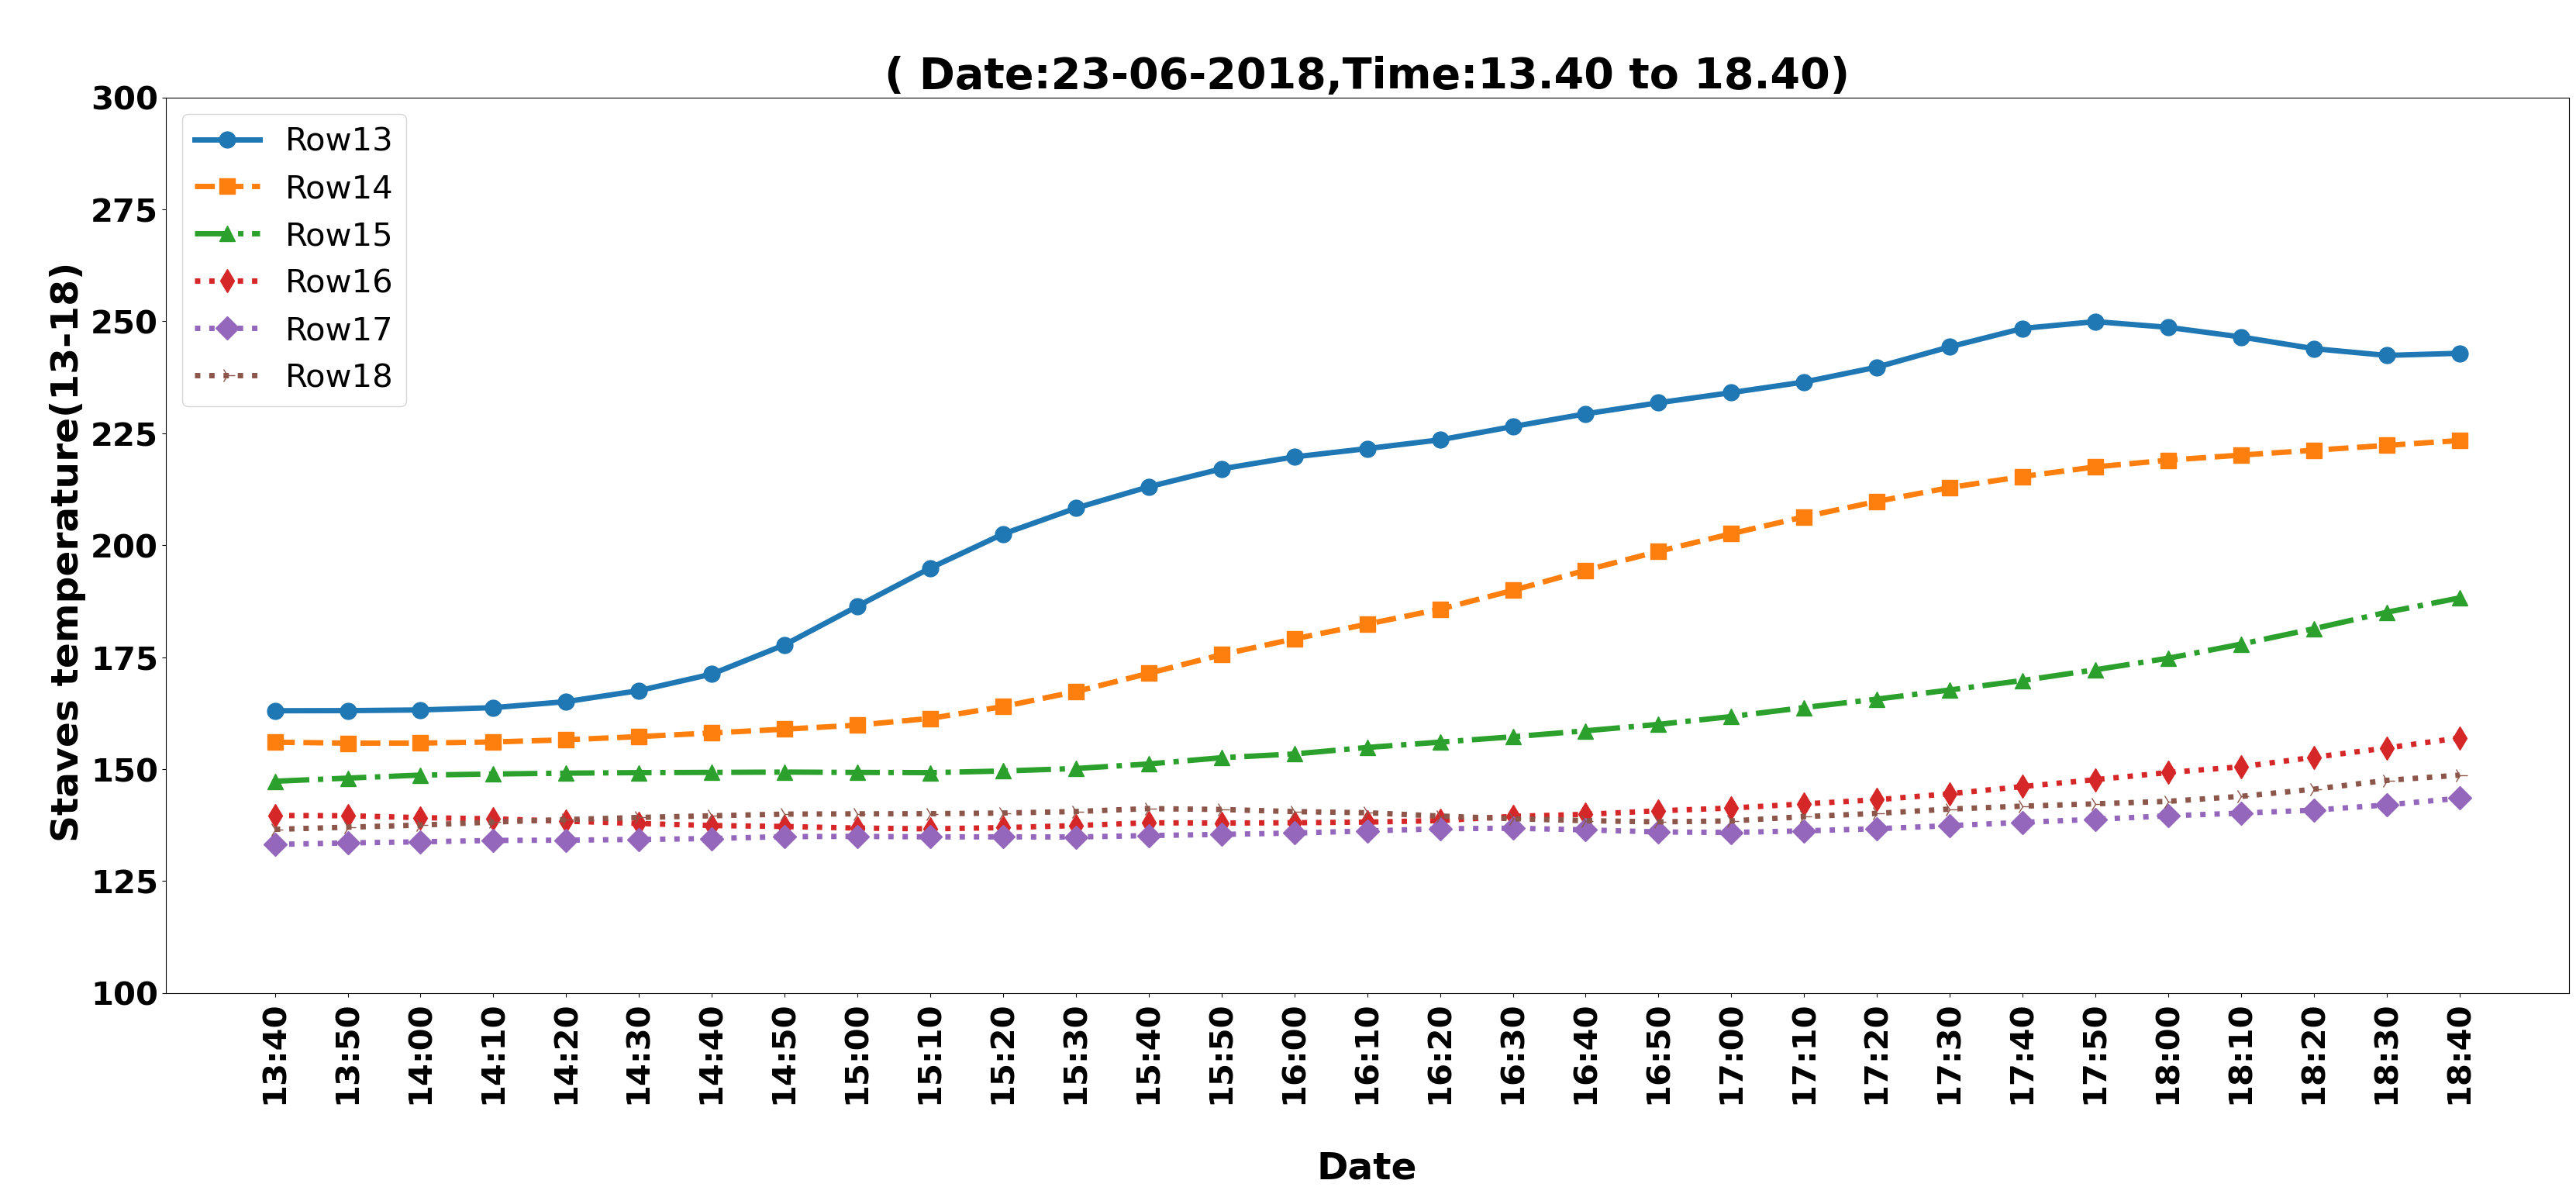

In [40]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Assuming 'Date' is your date column
df['Date'] = pd.to_datetime(df['Date'])

# Select the first 12 rows
df_subset = df.iloc[3100:3131, :]

# Plot all the lines in a single graph
plt.figure(figsize=(40, 15))

plt.plot(df_subset['Date'], df_subset[ 'Row13_avg'], label='Row13', linestyle='-', marker='o', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset[ 'Row14_avg'], label='Row14', linestyle='--', marker='s', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset[ 'Row15_avg'], label='Row15', linestyle='-.', marker='^', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset[ 'Row16_avg'], label='Row16', linestyle=':', marker='d', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset[ 'Row17_avg'], label='Row17', linestyle=':', marker='D', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset[ 'Row18_avg'], label='Row18', linestyle=':', marker='4', markersize=15, linewidth=5)
# Set y-axis limits
plt.ylim(100, 300)

plt.title('\n( Date:23-06-2018,Time:13.40 to 18.40)', fontsize=40, fontweight='bold')

plt.xticks(df_subset['Date'], [dt.strftime('%H:%M') for dt in df_subset['Date']], rotation=90, fontsize=30, fontweight='bold')       

plt.ylabel('\nStaves temperature(13-18) ', fontsize=35, fontweight='bold')
plt.xlabel('\nDate', fontsize=35, fontweight='bold')
plt.legend(fontsize=30)
plt.yticks(fontsize=30, fontweight='bold')

plt.show()


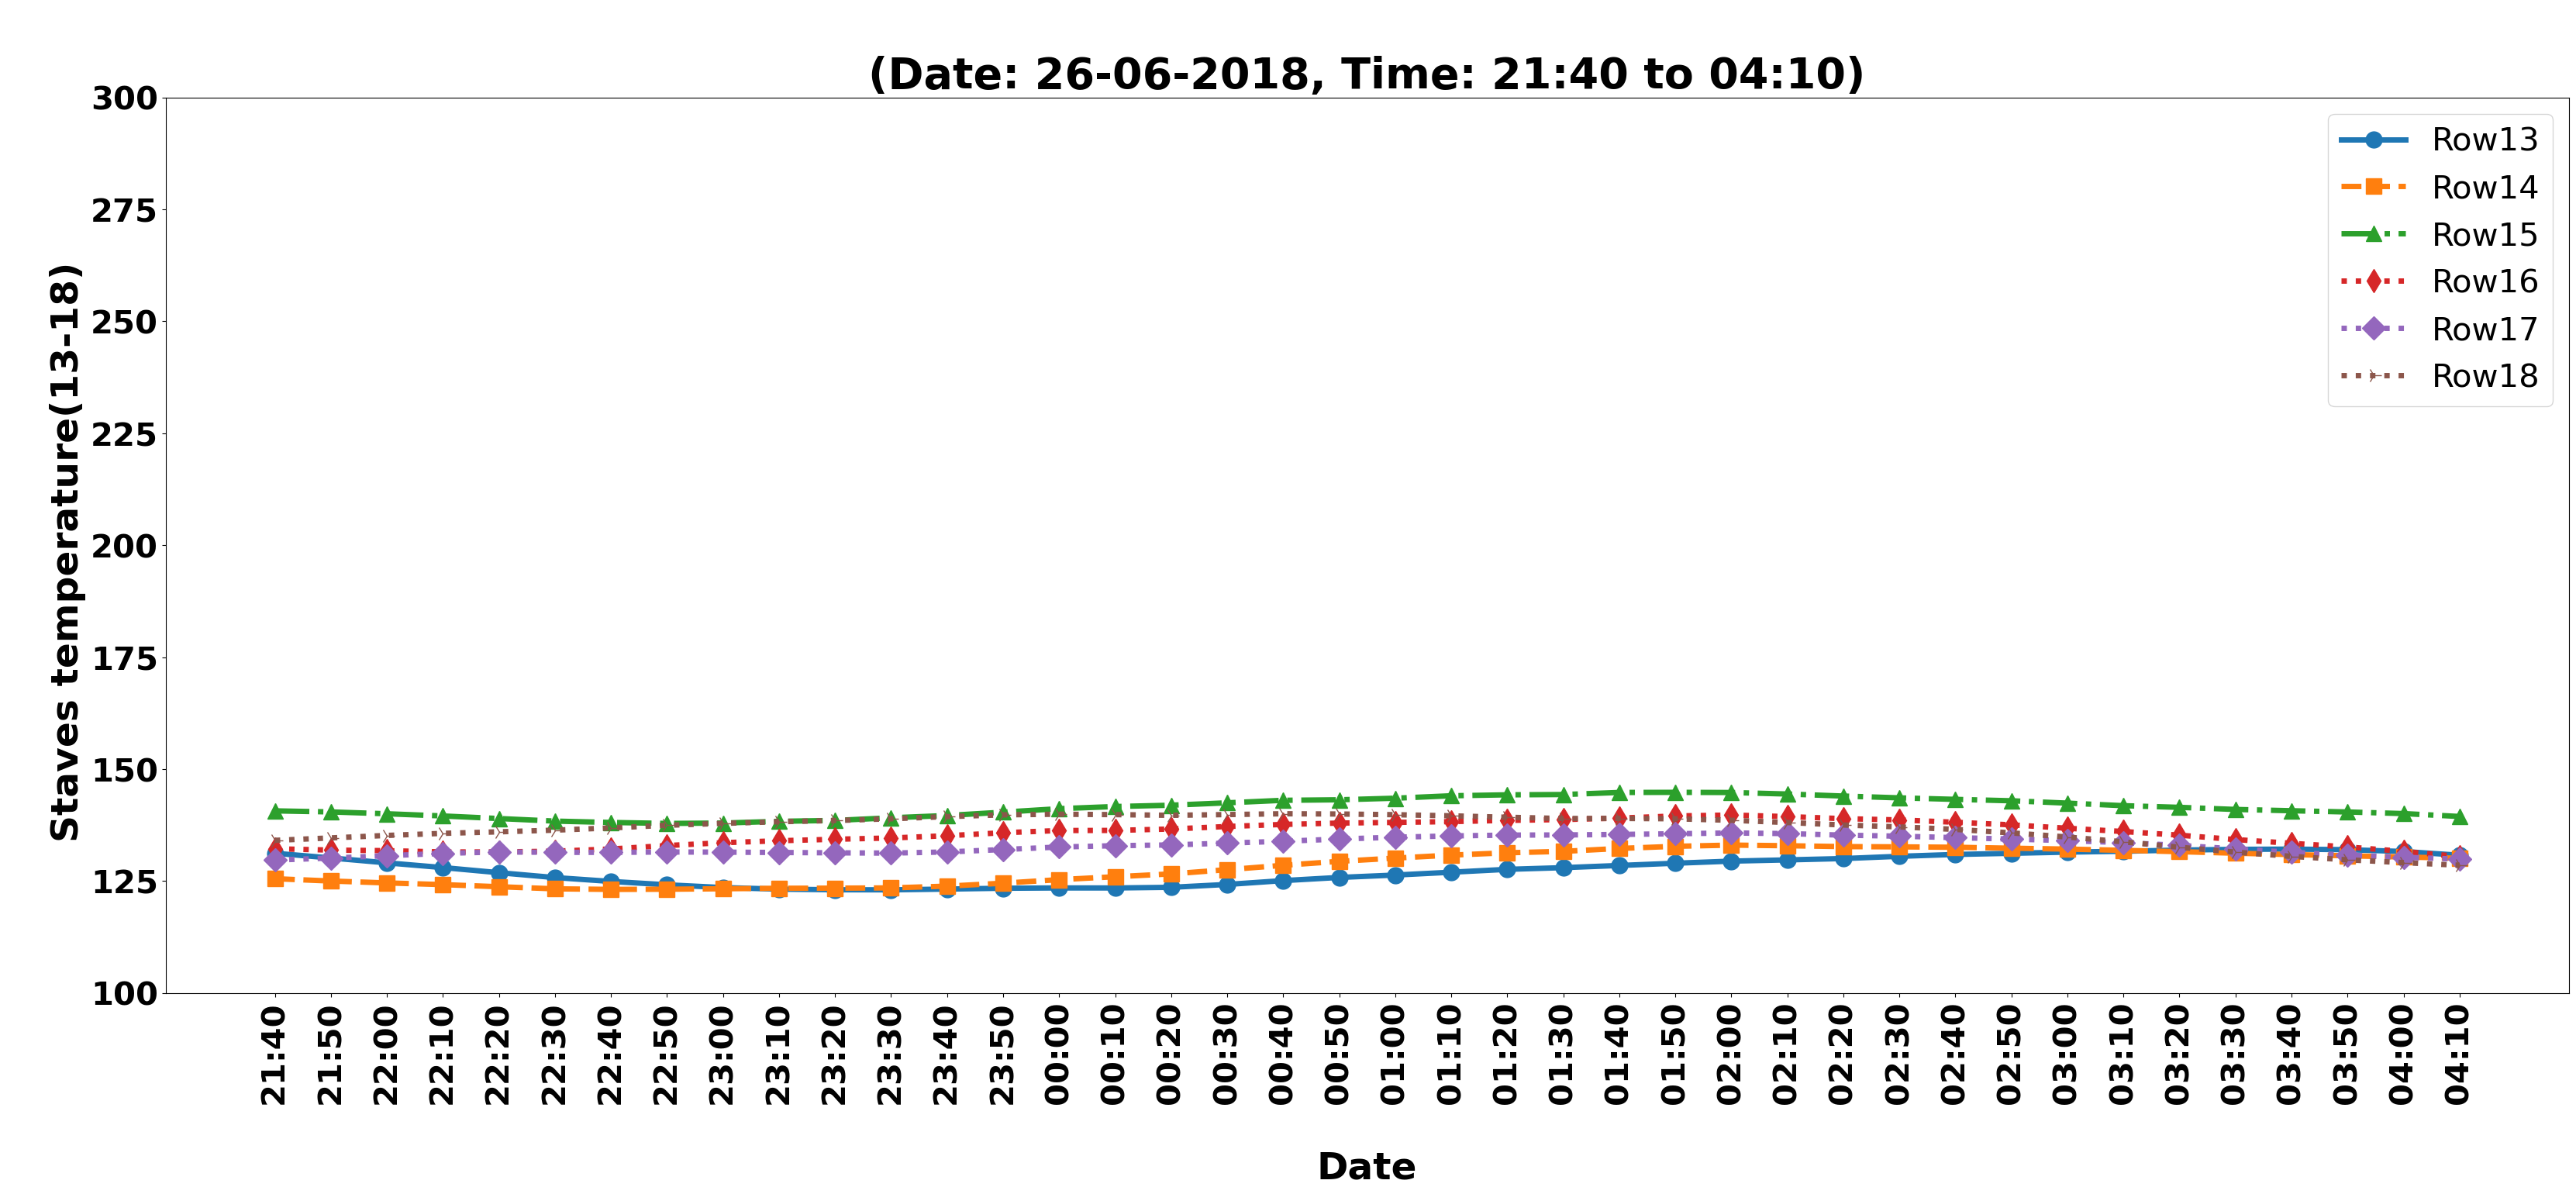

In [42]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Assuming 'Date' is your date column
df['Date'] = pd.to_datetime(df['Date'])

# Select the first 12 rows
df_subset = df.iloc[3580:3620, :]

# Plot all the lines in a single graph
plt.figure(figsize=(40, 15))

plt.plot(df_subset['Date'], df_subset[ 'Row13_avg'], label='Row13', linestyle='-', marker='o', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset[ 'Row14_avg'], label='Row14', linestyle='--', marker='s', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset[ 'Row15_avg'], label='Row15', linestyle='-.', marker='^', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset[ 'Row16_avg'], label='Row16', linestyle=':', marker='d', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset[ 'Row17_avg'], label='Row17', linestyle=':', marker='D', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset[ 'Row18_avg'], label='Row18', linestyle=':', marker='4', markersize=15, linewidth=5)

# Set y-axis limits
plt.ylim(100, 300)

plt.title('\n(Date: 26-06-2018, Time: 21:40 to 04:10)', fontsize=40, fontweight='bold')

plt.xticks(df_subset['Date'], [dt.strftime('%H:%M') for dt in df_subset['Date']], rotation=90, fontsize=30, fontweight='bold')       

plt.ylabel('\nStaves temperature(13-18) ', fontsize=35, fontweight='bold')
plt.xlabel('\nDate', fontsize=35, fontweight='bold')
plt.legend(fontsize=30)
plt.yticks(fontsize=30, fontweight='bold')

plt.show()


import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Assuming 'Date' is your date column
df['Date'] = pd.to_datetime(df['Date'])

# Select the first 12 rows
df_subset = df.iloc[3580:3620, :]

# Plot all the lines in a single graph
plt.figure(figsize=(40, 15))

plt.plot(df_subset['Date'], df_subset['QUAD1_Heat_loss'], label='QUAD1', linestyle='-', marker='o',  markersize=15,linewidth=5)
plt.plot(df_subset['Date'], df_subset['QUAD2_Heat_loss'], label='QUAD2', linestyle='--', marker='s', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset['QUAD3_Heat_loss'], label='QUAD3', linestyle='-.', marker='^', markersize=15, linewidth=5)
plt.plot(df_subset['Date'], df_subset['QUAD4_Heat_loss'], label='QUAD4', linestyle=':', marker='d', markersize=15, linewidth=5)


plt.title('\n(Date: 26-06-2018, Time: 21:40 to 04:10)', fontsize=40, fontweight='bold')

plt.xticks(df_subset['Date'], [dt.strftime('%H:%M') for dt in df_subset['Date']], rotation=90, fontsize=30,fontweight='bold')       

plt.ylabel('\nQuadrant-wise Heat Loss', fontsize=35, fontweight='bold')
plt.xlabel('\nDate', fontsize=35,fontweight='bold')
plt.legend()
plt.yticks(fontsize=30, fontweight='bold')
plt.show()

In [ ]:
xyz

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'Date' is your date column
df['Date'] = pd.to_datetime(df['Date'])

# Select the first 12 rows
df_subset = df.iloc[3220:3251, :]

# Define color ranges and corresponding colors
color_ranges = [(0, 0.27, 'green'), (0.27, 0.65, 'yellow'), (0.65, 1.0, 'red')]
# Create a colormap based on the specified color ranges
colors = [color for _, _, color in color_ranges]
cmap = ListedColormap(colors)

# Increase the figure size and axis visibility
plt.figure(figsize=(40, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size


# Increase the figure size and axis visibility
fig, ax = plt.subplots(figsize=(40, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size

# Fill background with gradient color
ax.fill_between(df_subset['Date'], df_subset['Probability'].min(), df_subset['Probability'].max(), color='gray', alpha=0.1)

# Fill specific ranges with gradient color
for ymin, ymax, color in color_ranges:
    ax.fill_between(df_subset['Date'], ymin, ymax, color=color, alpha=0.7)

# Plot the line graph over the filled background
ax.plot(df_subset['Date'], df_subset['Probability'], marker='o', markersize=15, linestyle='-', color='black', linewidth=5, label='Probability')
# Highlight points where Probability exceeds 0.75
for index, row in df_subset.iterrows():
    if row['Probability'] > 0.657:
        ax.scatter(row['Date'], row['Probability'], c='red', marker='o', s=300)
    if row['Channelling'] == 1:
        ax.scatter(row['Date'], 0.9, c='blue', marker='D', s=300)  # y-value set to 0.9 for visibility
# Add a margin line at 0.154 probability
ax.axhline(y=0.154, color='black', linestyle='--', linewidth=2, label='Margin at 0.154 Probability')

ax.set_title('RF model Probability Over Time (Date:23-06-2018,Time:13.40 to 18.40 )', fontsize=40)
ax.set_xlabel('Date', fontsize=35,fontweight='bold')
ax.set_ylabel('Probability', fontsize=35,fontweight='bold')

# Format x-axis ticks to include both date and time stacked vertically
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.tick_params(axis='x', labelsize=15)  # Adjust the label size as needed
for label in ax.get_xticklabels():
     label.set_fontweight('bold')
plt.xticks(df_subset['Date'], rotation=90, fontsize=30)

# Set the desired y-axis scale
ax.set_yticks([0, 0.15, 0.27, 0.65, 1.0])
ax.set_yticklabels([0, 0.15, 0.27, 0.65, 1.0], fontsize=30,fontweight='bold')   # Modify the list based on your desired scale

#ax.legend(fontsize=15)
plt.show()

In [ ]:
df.columns

In [ ]:
xyz

# line plot for staves temperatures 

In [ ]:
ds = pd.read_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\PT_contoours.xlsx')

In [ ]:
ds

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming 'ds' is your dataset
# Select columns for scaling (excluding "Unnamed: 0", "Serial_No", and "Date")
columns_to_scale = [col for col in ds.columns if col not in ["Unnamed: 0", "Serial_No", "Date"]]

# Extract columns to scale
data_to_scale = ds[columns_to_scale]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(data_to_scale)

# Convert scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Combine scaled data with untouched columns
for col in ["Unnamed: 0", "Serial_No", "Date"]:
    scaled_df[col] = ds[col]


In [ ]:
ds1 = scaled_df

In [ ]:
ds1

In [ ]:
ds.columns.tolist()

In [ ]:
ds.Row8_Q1

In [ ]:
import matplotlib.pyplot as plt

# Assuming ds_subset is your subset DataFrame containing the data
# Replace 'ds_subset' with the actual name of your DataFrame

# Selecting the specific date to plot
date_to_plot = '2018-06-23 14:40:00'

# Finding the row corresponding to the specified date
row_to_plot = ds1[ds1['Date'] == date_to_plot]

# Extracting the values for the specific rows
values_to_plot_Q1 = row_to_plot[['Row8_Q1', 'Row9_Q1', 'Row10_Q1', 'Row11_Q1', 'Row12_Q1']].values.flatten()
values_to_plot_Q2 = row_to_plot[['Row8_Q2', 'Row9_Q2', 'Row10_Q2', 'Row11_Q2', 'Row12_Q2']].values.flatten()
values_to_plot_Q3 = row_to_plot[['Row8_Q3', 'Row9_Q3', 'Row10_Q3', 'Row11_Q3', 'Row12_Q3']].values.flatten()
values_to_plot_Q4 = row_to_plot[['Row8_Q4', 'Row9_Q4', 'Row10_Q4', 'Row11_Q4', 'Row12_Q4']].values.flatten()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(range(1, len(values_to_plot_Q1) + 1), values_to_plot_Q1, label='Q1')
plt.plot(range(1, len(values_to_plot_Q2) + 1), values_to_plot_Q2, label='Q2')
plt.plot(range(1, len(values_to_plot_Q3) + 1), values_to_plot_Q3, label='Q3')
plt.plot(range(1, len(values_to_plot_Q4) + 1), values_to_plot_Q4, label='Q4')

#plt.xlabel('Rows')
plt.ylabel('Values')
plt.title('Line Plot for Specific Date')
plt.legend()

# Setting y-axis limits
plt.ylim(0, 1)
#plt.yticks(range(0, 1, 0.2))
plt.xticks(range(1, 6), ['Row8', 'Row9', 'Row10', 'Row11', 'Row12'])
plt.grid(False)
plt.show()

Row8_Q1,Row9_Q1,Row10_Q1,Row11_Q1,Row12_Q1,Row13_Q1

# comments animation 

from matplotlib.animation import FuncAnimation, PillowWriter

# Assuming 'Date' is your date column
df['Date'] = pd.to_datetime(df['Date'])

# Select the first 12 rows
df_subset = df.iloc[3100:3131, :]

# Increase the figure size and axis visibility
fig, ax = plt.subplots(figsize=(40, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size

# Fill background with gradient color
ax.fill_between(df_subset['Date'], df_subset['Probability'].min(), df_subset['Probability'].max(), color='gray', alpha=0.1)

# Fill specific ranges with gradient color
for ymin, ymax, color in color_ranges:
    ax.fill_between(df_subset['Date'], ymin, ymax, color=color, alpha=0.7)

# Plot the line graph over the filled background
line, = ax.plot(df_subset['Date'], df_subset['Probability'], marker='o', markersize=15, linestyle='-', color='black', linewidth=5, label='Probability')

ax.axhline(y=0.154, color='black', linestyle='--', linewidth=2, label='Margin at 0.154 Probability')

# Create a separate box for pop-up comments
comment_box = ax.text(0.5, 0.9, '', transform=ax.transAxes, fontsize=15, color='purple', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Animation function for pop-up comments
def update_comments(frame):
    if df_subset['Probability'].iloc[frame] > 0.657:
        comment_text = 'Reduce HBV by 10 kNm3/h'
        comment_box.set_text(comment_text)
        comment_box.set_position((df_subset['Date'].iloc[frame], df_subset['Probability'].iloc[frame] + 0.2))
    else:
        comment_box.set_text('')  # Clear the comment if the threshold is not triggered

# Create the animation for pop-up comments
comment_animation = FuncAnimation(fig, update_comments, frames=len(df_subset['Date']), interval=2000, blit=False)

# Save the animation as a separate GIF
comment_animation.save(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\comment_animation.gif', writer=PillowWriter(fps=1))

# ... (rest of the code)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

# Assuming 'Date' is your date column
df['Date'] = pd.to_datetime(df['Date'])

# Select the first 12 rows
df_subset = df.iloc[3100:3131, :]

# Define color ranges and corresponding colors
color_ranges = [(0, 0.27, 'green'), (0.27, 0.65, 'yellow'), (0.65, 1.0, 'red')]

# Create a colormap based on the specified color ranges
colors = [color for _, _, color in color_ranges]
cmap = ListedColormap(colors)

# Normalize the y-axis values to map them to the colormap
norm = plt.Normalize(df_subset['Probability'].min(), df_subset['Probability'].max())

# Function to update the plot for each frame
def update(frame):
    plt.clf()
    
    # Fill background with gradient color
    plt.fill_between(df_subset['Date'][:frame+1], df_subset['Probability'].min(), df_subset['Probability'].max(), color='gray', alpha=0.1)

    # Fill specific ranges with gradient color
    for ymin, ymax, color in color_ranges:
        plt.fill_between(df_subset['Date'][:frame+1], ymin, ymax, color=color, alpha=0.7)

    # Plot the line graph over the filled background with thicker lines
    plt.plot(df_subset['Date'][:frame+1], df_subset['Probability'][:frame+1], marker='o',markersize=15, linestyle='-', color='black', linewidth=5, label='Probability')
     # Plot the line graph over the filled background
    
    # Highlight points where Probability exceeds 0.75
    for index, row in df_subset[:frame+1].iterrows():
        if row['Probability'] > 0.657:
            plt.text(row['Date'], row['Probability'], 'Alert!', fontsize=12, color='black', ha='left', va='bottom')
    
    # Add a margin line at 0.154 probability
    plt.axhline(y=0.154, color='black', linestyle='--', linewidth=2, label='Margin at 0.154 Probability')
    plt.title('RF model Probability Over Time (Date: 23-06-2018, Time: 13:40 to 18:40)', fontsize=30)  # Increased font size
    plt.xlabel('Date', fontsize=25)  # Increased font size
    plt.ylabel('Probability', fontsize=25)  # Increased font size

    # Format x-axis ticks to include both date and time
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    
    plt.xticks(df_subset['Date'][:frame+1], rotation=0, fontsize=15)  # Increased font size

    # Set the desired y-axis scale
    plt.yticks([0, 0.15, 0.27, 0.65, 1.0], fontsize=15)  # Increased font size

    plt.legend(fontsize=15)  # Increased font size

# Create a larger figure
fig = plt.figure(figsize=(30, 10))

# Create an animation
animation = FuncAnimation(fig, update, frames=len(df_subset), interval=3000, repeat=False)

# Save the animation as a GIF file
animation.save(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\probability_animation8.gif', writer=PillowWriter(fps=1))
plt.show()

# tested the  the fuzzy logic for 1 hour data

In [ ]:
sheet_name_to_read = 'Sheet1'
df2 = pd.read_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\1hour_probablity_1.xlsx' , sheet_name=sheet_name_to_read)

In [ ]:
selected_dates = df2['Date'].iloc[::50]

# Filter the DataFrame based on the selected dates
selected_data = df2[df2['Date'].isin(selected_dates)]

# Plotting
plt.figure(figsize=(30, 10))

plt.plot(selected_data['Date'], selected_data[ 'Probability'], marker='o', linestyle='-', color='b')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S\n%Y-%m-%d'))
plt.title('Line Plot of Probability Over Time(2hours)')
plt.xlabel('Date')

In [ ]:
df2.Date.head(40)

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'Date' is your date column
df2['Date'] = pd.to_datetime(df2['Date'])

# Select the first 12 rows
df_subset = df2.iloc[70:80, :]

# Define color ranges and corresponding colors
color_ranges = [(0, 0.27, 'green'), (0.27, 0.65, 'yellow'), (0.65, 1.0, 'red')]

# Create a colormap based on the specified color ranges
colors = [color for _, _, color in color_ranges]
cmap = ListedColormap(colors)

# Increase the figure size and axis visibility
plt.figure(figsize=(40, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size

# Fill background with gradient color
plt.fill_between(df_subset['Date'], df_subset['Probability'].min(), df_subset['Probability'].max(), color='gray', alpha=0.1)

# Fill specific ranges with gradient color
for ymin, ymax, color in color_ranges:
    plt.fill_between(df_subset['Date'], ymin, ymax, color=color, alpha=0.7)

# Plot the line graph over the filled background
plt.plot(df_subset['Date'], df_subset['Probability'], marker='o', markersize=15, linestyle='-', color='black', linewidth=5, label='Probability')
# Highlight points where Probability exceeds 0.75
for index, row in df_subset.iterrows():
    if row['Probability'] > 0.657:
        plt.scatter(row['Date'], row['Probability'], c='red', marker='o', s=200)
    if row['Channelling'] == 1:
        plt.scatter(row['Date'], 0.9, c='blue', marker='D', s=300)  # y-value set to 0.9 for visibility
# Add a margin line at 0.154 probability
plt.axhline(y=0.154, color='black', linestyle='--', linewidth=2, label='Margin at 0.154 Probability')

plt.title('RF model Probability Over hourly Time (94:100)', fontsize=40)
plt.xlabel('\nDate', fontsize=40)
plt.ylabel('\nProbability', fontsize=40)

# Format x-axis ticks to include both date and time stacked vertically
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%Y-%m-%d'))
plt.xticks(df_subset['Date'], rotation=0, fontsize=20)

# Set the desired y-axis scale
plt.yticks([0,0.15, 0.27, 0.65, 1.0],fontsize=35)  # Modify the list based on your desired scale

plt.legend(fontsize=15)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

# Assuming 'Date' is your date column
df['Date'] = pd.to_datetime(df['Date'])

# Select the first 12 rows
df_subset = df.iloc[3100:3131, :]

# Define color ranges and corresponding colors
color_ranges = [(0, 0.5, 'green'), (0.5, 0.8, 'yellow'), (0.8, 1.0, 'red')]

# Create a colormap based on the specified color ranges
colors = [color for _, _, color in color_ranges]
cmap = ListedColormap(colors)

# Normalize the y-axis values to map them to the colormap
norm = plt.Normalize(df_subset['Probability'].min(), df_subset['Probability'].max())

# Function to update the plot for each frame
def update(frame):
    plt.clf()
    
    # Fill background with gradient color
    plt.fill_between(df_subset['Date'][:frame+1], df_subset['Probability'].min(), df_subset['Probability'].max(), color='gray', alpha=0.1)

    # Fill specific ranges with gradient color
    for ymin, ymax, color in color_ranges:
        plt.fill_between(df_subset['Date'][:frame+1], ymin, ymax, color=color, alpha=0.7)

    # Plot the line graph over the filled background
    plt.plot(df_subset['Date'][:frame+1], df_subset['Probability'][:frame+1], marker='o', linestyle='-', color='black', label='Probability')

    # Highlight points where Probability exceeds 0.75
    for index, row in df_subset[:frame+1].iterrows():
        if row['Probability'] > 0.65:
            plt.annotate('  Alert!', (row['Date'], row['Probability']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=7, color='black')

    plt.title('RF model Probability Over Time', fontsize=10)
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Probability', fontsize=15)

    # Format x-axis ticks to include both date and time
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.xticks(df_subset['Date'][:frame+1], rotation=0, fontsize=5)

    plt.yticks(fontsize=5)  # Increase y-axis tick font size
    plt.legend(fontsize=5)

# Create an animation
animation = FuncAnimation(plt.gcf(), update, frames=len(df_subset), interval=1000, repeat=False)

# Save the animation as a GIF file
animation.save(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\probability_animation5.gif', writer=PillowWriter(fps=1))
plt.show()

In [ ]:
# Quardantwise heat loss 

In [ ]:
df.columns

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Assuming 'Date' is your date column
df['Date'] = pd.to_datetime(df['Date'])

# Select the first 12 rows
df_subset = df.iloc[3100:3131, :]

# Plot all the lines in a single graph
plt.figure(figsize=(25, 7))

plt.plot(df_subset['Date'], df_subset[ 'Total_Heat_loss'], label='QUAD1', linestyle='-', marker='o')
plt.plot(df_subset['Date'], df_subset['QUAD2_Heat_loss'], label='QUAD2', linestyle='--', marker='s')
plt.plot(df_subset['Date'], df_subset['QUAD3_Heat_loss'], label='QUAD3', linestyle='-.', marker='^')
#plt.plot(df_subset['Date'], df_subset['QUAD4_Heat_loss'], label='QUAD4', linestyle=':', marker='d')

plt.title('Heat Loss Quadrant-wise Over Time(3100:3130)')
plt.xticks(df_subset['Date'], [dt.strftime('%Y-%m-%d %H:%M:%S') for dt in df_subset['Date']], rotation=45, fontsize=10)
plt.ylabel('Quadrant-wise Heat Loss')
plt.xlabel('Date', fontsize=20)
plt.legend()

plt.show()

## diff pressure 

In [ ]:
df.columns

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Assuming 'Date' is your date column
df['Date'] = pd.to_datetime(df['Date'])

# Select the first 12 rows
df_subset = df.iloc[3100:3131, :]

# Plot all the lines in a single graph
plt.figure(figsize=(25, 7))

plt.plot(df_subset['Date'], df_subset['diff_pressure'], label='DP', linestyle='-', marker='o')
plt.plot(df_subset['Date'], df_subset[ 'Top_Diff_Press'], label='TDP', linestyle='--', marker='s')
plt.plot(df_subset['Date'], df_subset[ 'Middle_Diff_Press'], label='MDP', linestyle='-.', marker='^')
plt.plot(df_subset['Date'], df_subset[ 'Bottom_Diff_Press'], label='BDP', linestyle=':', marker='d')

plt.title('Differential pressure Over Time(3100:3130)')
plt.xticks(df_subset['Date'], [dt.strftime('%Y-%m-%d %H:%M:%S') for dt in df_subset['Date']], rotation=45, fontsize=10)
plt.ylabel('\nDifferential pressure')
plt.xlabel('Date', fontsize=20)
plt.legend()

plt.show()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Assuming 'Date' is your date column
df['Date'] = pd.to_datetime(df['Date'])

# Select the first 12 rows
df_subset = df.iloc[1200:1231, :]

# Plot all the lines in a single graph
plt.figure(figsize=(25, 7))

plt.plot(df_subset['Date'], df_subset['diff_pressure'], label='DP', linestyle='-', marker='o')
plt.plot(df_subset['Date'], df_subset[ 'Top_Diff_Press'], label='TDP', linestyle='--', marker='s')
plt.plot(df_subset['Date'], df_subset[ 'Middle_Diff_Press'], label='MDP', linestyle='-.', marker='^')
plt.plot(df_subset['Date'], df_subset[ 'Bottom_Diff_Press'], label='BDP', linestyle=':', marker='d')

plt.title('Differential pressure Over Time(3100:3130)')
plt.xticks(df_subset['Date'], [dt.strftime('%Y-%m-%d %H:%M:%S') for dt in df_subset['Date']], rotation=45, fontsize=10)
plt.ylabel('\nDifferential pressure')
plt.xlabel('Date', fontsize=20)
plt.legend()

plt.show()

# ETA CO

In [ ]:
df_subset = df.iloc[3100:3131, :]

# Define color ranges and corresponding colors
color_ranges = [(15, 28, 'green'), (28, 40, 'yellow')]

# Create a colormap based on the specified color ranges
colors = [color for _, _, color in color_ranges]
cmap = ListedColormap(colors)

# Normalize the y-axis values to map them to the colormap
norm = plt.Normalize(df_subset['Total_Heat_loss'].min(), df_subset['Total_Heat_loss'].max())

# Increase the figure size and axis visibility
plt.figure(figsize=(40, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size

# Fill background with gradient color
plt.fill_between(df_subset['Date'], df_subset['Total_Heat_loss'].min(), df_subset['Total_Heat_loss'].max(), color='gray', alpha=0.1)

# Fill specific ranges with gradient color
for ymin, ymax, color in color_ranges:
    plt.fill_between(df_subset['Date'], ymin, ymax, color=color, alpha=0.7)

# Plot the line graph over the filled background
plt.plot(df_subset['Date'], df_subset['Total_Heat_loss'],  marker='o', markersize=15, linestyle='-', color='black', linewidth=5, label='Total_Heat_loss')

plt.title('\n(Date: 23-06-2018, Time: 13:40 to 18:40)', fontsize=40,fontweight='bold')
plt.xlabel('\nDate', fontsize=35,fontweight='bold')
plt.ylabel('Total_Heat_loss', fontsize=35,fontweight='bold')

# Format x-axis ticks to include both date and time
plt.xticks(df_subset['Date'], [dt.strftime('%H:%M') for dt in df_subset['Date']], rotation=90, fontsize=30,fontweight='bold')

plt.yticks(fontsize=30)  # Increase y-axis tick font size
#plt.legend(fontsize=20)
plt.show()

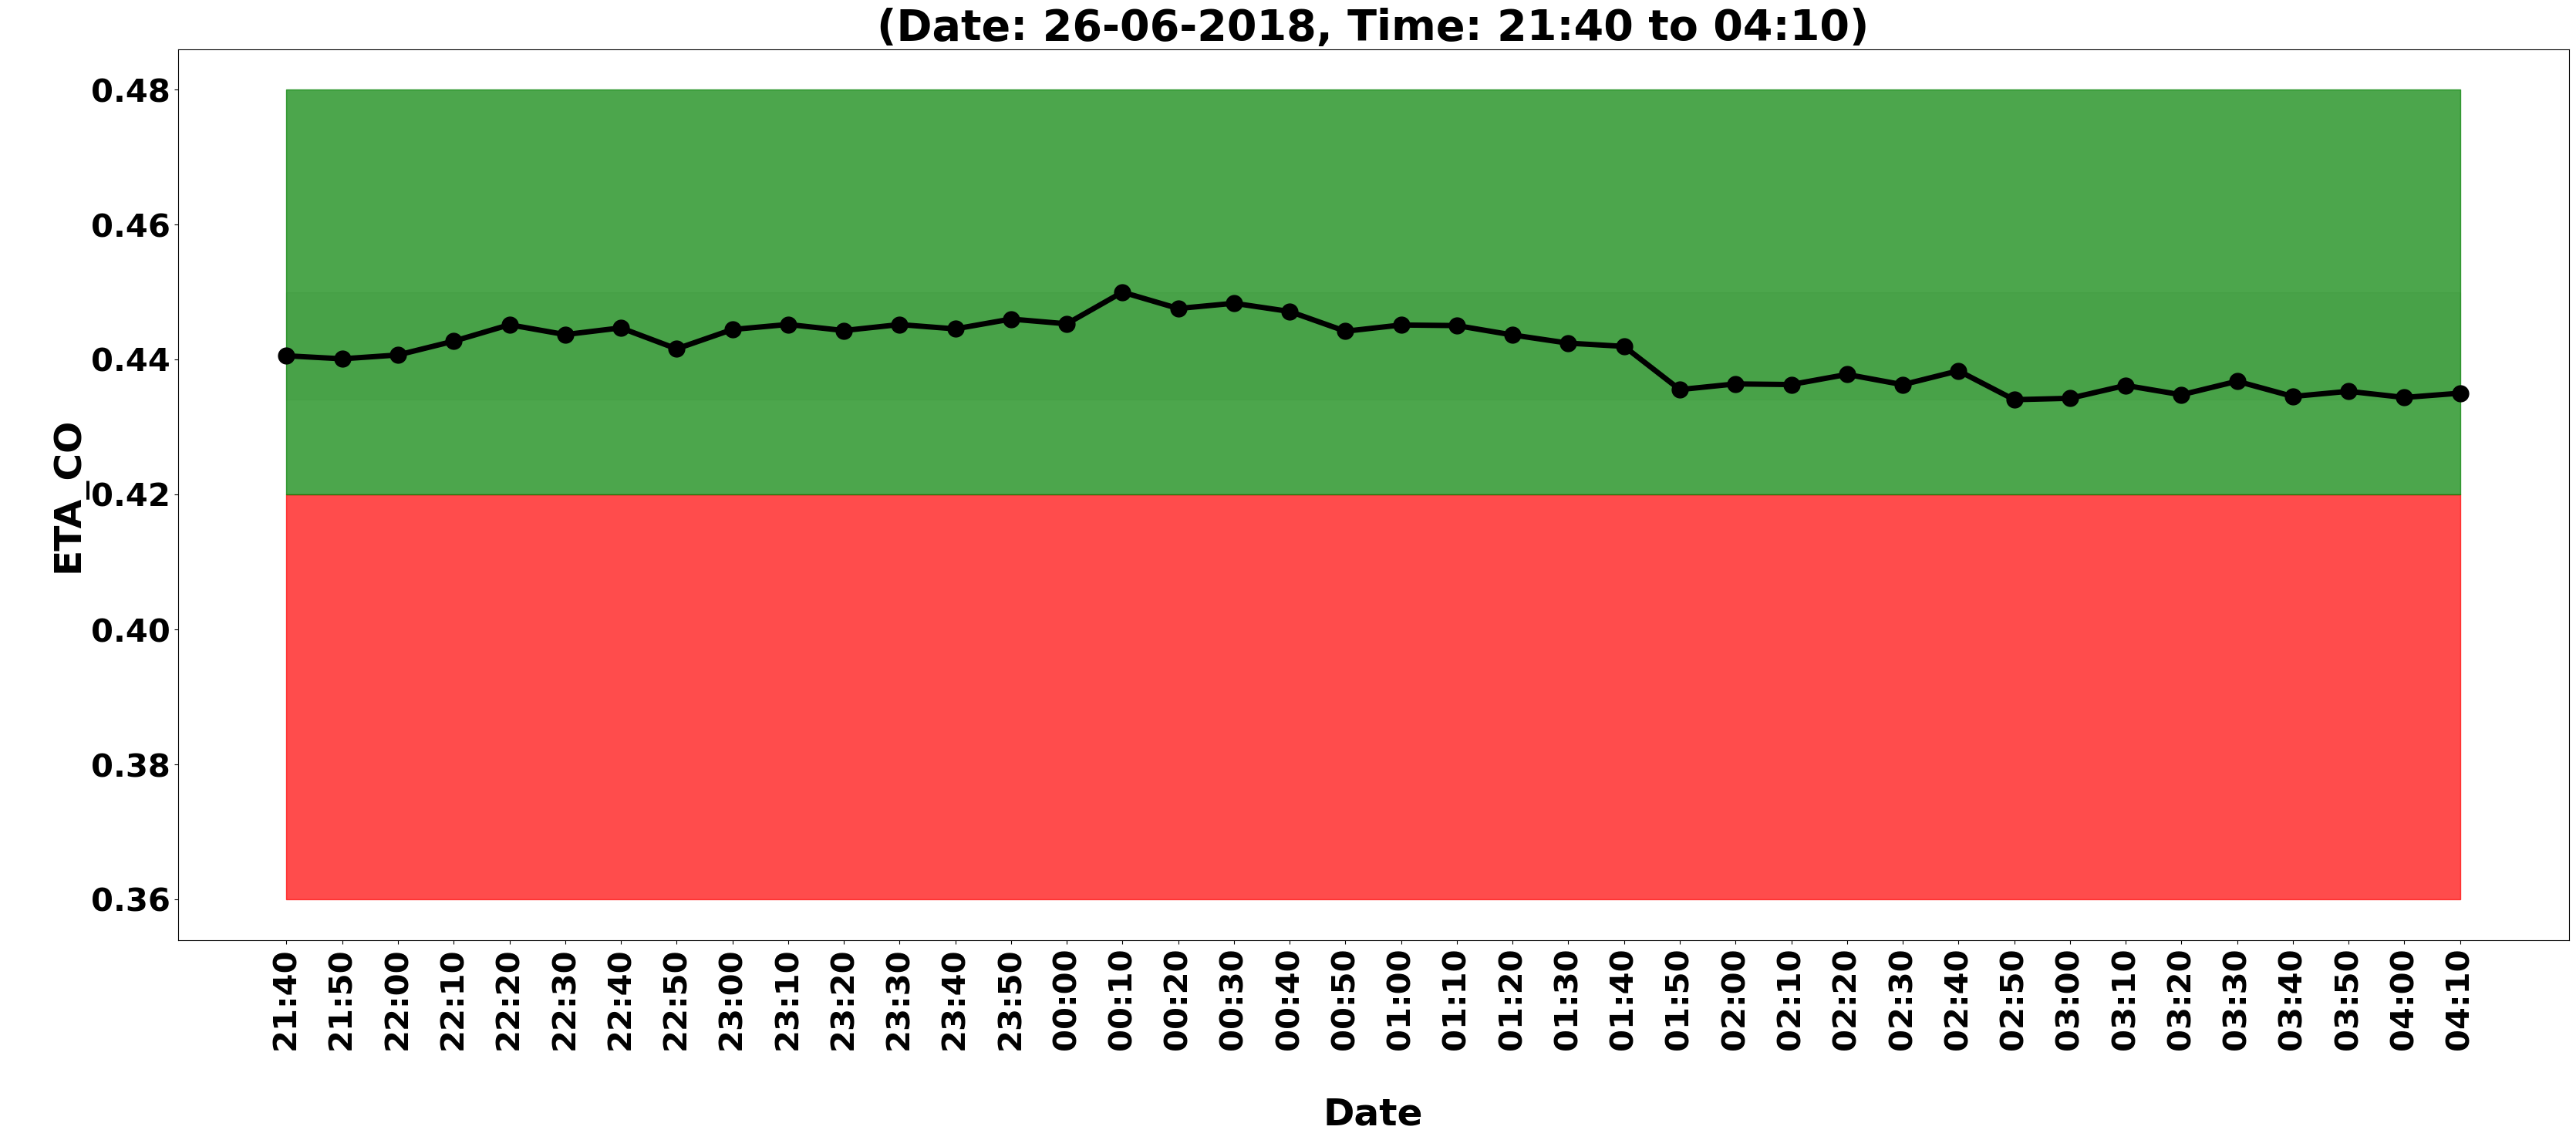

In [15]:
df_subset = df.iloc[3580:3620, :]

# Define color ranges and corresponding colors
color_ranges = [(0.36, 0.42, 'red'), (0.42, 0.48, 'green')]

# Create a colormap based on the specified color ranges
colors = [color for _, _, color in color_ranges]
cmap = ListedColormap(colors)

# Normalize the y-axis values to map them to the colormap
norm = plt.Normalize(df_subset['ETA_CO'].min(), df_subset['ETA_CO'].max())

# Increase the figure size and axis visibility
plt.figure(figsize=(40, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size

# Fill background with gradient color
plt.fill_between(df_subset['Date'], df_subset['ETA_CO'].min(), df_subset['ETA_CO'].max(), color='gray', alpha=0.1)

# Fill specific ranges with gradient color
for ymin, ymax, color in color_ranges:
    plt.fill_between(df_subset['Date'], ymin, ymax, color=color, alpha=0.7)

# Plot the line graph over the filled background
plt.plot(df_subset['Date'], df_subset['ETA_CO'],  marker='o', markersize=15, linestyle='-', color='black', linewidth=5, label='ETA_CO')

plt.title('(Date: 26-06-2018, Time: 21:40 to 04:10)', fontsize=40,fontweight='bold')
plt.xlabel('\nDate', fontsize=35 ,fontweight='bold')
plt.ylabel('\nETA_CO', fontsize=35,fontweight='bold')

# Format x-axis ticks to include both date and time
plt.xticks(df_subset['Date'], [dt.strftime('%H:%M') for dt in df_subset['Date']], rotation=90, fontsize=30,fontweight='bold')

plt.yticks(fontsize=30,fontweight='bold')  # Increase y-axis tick font size
#plt.legend(fontsize=20)
plt.show()

# Total heat loss

In [ ]:
df_subset = df.iloc[3100:3131, :]

# Define color ranges and corresponding colors
color_ranges = [(15, 28, 'green'), (28, 40, 'yellow')]

# Create a colormap based on the specified color ranges
colors = [color for _, _, color in color_ranges]
cmap = ListedColormap(colors)

# Normalize the y-axis values to map them to the colormap
norm = plt.Normalize(df_subset['Total_Heat_loss'].min(), df_subset['Total_Heat_loss'].max())

# Increase the figure size and axis visibility
plt.figure(figsize=(60, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size

# Fill background with gradient color
plt.fill_between(df_subset['Date'], df_subset['Total_Heat_loss'].min(), df_subset['Total_Heat_loss'].max(), color='gray', alpha=0.1)

# Fill specific ranges with gradient color
for ymin, ymax, color in color_ranges:
    plt.fill_between(df_subset['Date'], ymin, ymax, color=color, alpha=0.7)

# Plot the line graph over the filled background
plt.plot(df_subset['Date'], df_subset['Total_Heat_loss'],  marker='o', markersize=15, linestyle='-', color='black', linewidth=5, label='Total_Heat_loss')

plt.title('\n\nTotal_Heat_loss Over Time ((Date: 23-06-2018, Time: 13:40 to 18:40))', fontsize=50)
plt.xlabel('\nDate', fontsize=50)
plt.ylabel('Total_Heat_loss', fontsize=50)

# Format x-axis ticks to include both date and time
plt.xticks(df_subset['Date'], [dt.strftime('%H:%M') for dt in df_subset['Date']], rotation=45, fontsize=20)

plt.yticks(fontsize=30)  # Increase y-axis tick font size
plt.legend(fontsize=20)
plt.show()

# heat loss animation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

# Assuming 'Date' is your date column
df['Date'] = pd.to_datetime(df['Date'])

# Select the data subset
df_subset = df.iloc[3100:3131, :]

# Define color ranges and corresponding colors
color_ranges = [(15, 28, 'green'), (28, 40, 'yellow')]

# Create a colormap based on the specified color ranges
colors = [color for _, _, color in color_ranges]
cmap = ListedColormap(colors)

# Normalize the y-axis values to map them to the colormap
norm = plt.Normalize(df_subset['Total_Heat_loss'].min(), df_subset['Total_Heat_loss'].max())

# Function to update the plot for each frame
def update(frame):
    plt.clf()

    # Fill background with gradient color
    plt.fill_between(df_subset['Date'][:frame+1], df_subset['Total_Heat_loss'].min(), df_subset['Total_Heat_loss'].max(), color='gray', alpha=0.1)

    # Fill specific ranges with gradient color
    for ymin, ymax, color in color_ranges:
        plt.fill_between(df_subset['Date'][:frame+1], ymin, ymax, color=color, alpha=0.7)

    # Plot the line graph over the filled background
    plt.plot(df_subset['Date'][:frame+1], df_subset['Total_Heat_loss'][:frame+1], marker='o', markersize=15, linestyle='-', color='black', linewidth=5, label='Total_Heat_loss')

    plt.title('Total Heat Loss Over Time (Date: 23-06-2018, Time: 13:40 to 18:40)', fontsize=30)
    plt.xlabel('Date', fontsize=25)
    plt.ylabel('Total Heat Loss', fontsize=25)

    # Format x-axis ticks to include both date and time
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.xticks(df_subset['Date'][:frame+1], [dt.strftime('%H:%M') for dt in df_subset['Date'][:frame+1]], rotation=0, fontsize=15)

    plt.yticks(fontsize=15)
    plt.legend(fontsize=15)

# Create a larger figure
fig = plt.figure(figsize=(30, 10))

# Create an animation
animation = FuncAnimation(fig, update, frames=len(df_subset), interval=3000, repeat=False)

# Save the animation as a GIF file
animation.save(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\total_heat_loss_animation.gif', writer=PillowWriter(fps=1))

plt.show()

# Uptake temp avg

In [ ]:
df_subset = df.iloc[3100:3131, :]

# Define color ranges and corresponding colors
color_ranges = [(80, 180, 'green'), (180, 300, 'yellow')]

# Create a colormap based on the specified color ranges
colors = [color for _, _, color in color_ranges]
cmap = ListedColormap(colors)

# Normalize the y-axis values to map them to the colormap
norm = plt.Normalize(df_subset['Uptake_tem_avg'].min(), df_subset['Uptake_tem_avg'].max())

# Increase the figure size and axis visibility
plt.figure(figsize=(50, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size

# Fill background with gradient color
plt.fill_between(df_subset['Date'], df_subset['Uptake_tem_avg'].min(), df_subset['Uptake_tem_avg'].max(), color='gray', alpha=0.1)

# Fill specific ranges with gradient color
for ymin, ymax, color in color_ranges:
    plt.fill_between(df_subset['Date'], ymin, ymax, color=color, alpha=0.7)

# Plot the line graph over the filled background
plt.plot(df_subset['Date'], df_subset['Uptake_tem_avg'],   marker='o', markersize=15, linestyle='-', color='black', linewidth=5, label='Uptake_tem_avg')

plt.title('\n\nUptake_tem_avg Over Time ([3100:3130)', fontsize=40)
plt.xlabel('\n\nDate', fontsize=40)
plt.ylabel('\n\nUptake_tem_avg', fontsize=40)

# Format x-axis ticks to include both date and time
plt.xticks(df_subset['Date'], [dt.strftime('%Y-%m-%d %H:%M:%S') for dt in df_subset['Date']], rotation=45, fontsize=20)       

plt.yticks(fontsize=30)  # Increase y-axis tick font size
plt.legend(fontsize=20)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define color ranges and corresponding colors
color_ranges = [(0, 0.27, 'green'), (0.27, 0.65, 'yellow'), (0.65, 1.0, 'red')]

# Plot the filled speedometer
def plot_speedometer(prob):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(1, -1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')

    # Plot filled wedge based on probability
    for start, end, color in color_ranges:
        wedge = patches.Wedge((0, 0), 1, start * 180, end * 180, color=color)
        ax.add_patch(wedge)

    # Plot needle indicating the probability
    needle_length = 0.8
    needle_angle = (prob / 1.0) * 180  # Normalize the angle
    needle_x = needle_length * np.cos(np.radians(needle_angle))
    needle_y = needle_length * np.sin(np.radians(needle_angle))
    ax.arrow(0, 0, needle_x, needle_y, head_width=0.05, head_length=0.1, fc='k', ec='k')

    plt.title(f'Probability: {prob}')
    plt.show()

# Display the filled speedometer with a sample probability (e.g., 0.9)
plot_speedometer(0.17)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Define color ranges and corresponding colors
color_ranges = [(0, 0.27, 'green'), (0.27, 0.65, 'yellow'), (0.65, 1.0, 'red')]

# Plot the filled speedometer for a DataFrame subset
def plot_speedometer_for_subset(df_subset):
    for index, row in df_subset.iterrows():
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.set_xlim(1, -1)
        ax.set_ylim(0, 1)
        ax.set_aspect('equal')

        # Plot filled wedge based on probability
        for start, end, color in color_ranges:
            wedge = patches.Wedge((0, 0), 1, start * 180, end * 180, color=color)
            ax.add_patch(wedge)

        # Plot needle indicating the probability
        prob = round(row['Probability'], 2)  # Round to 2 decimal places
        needle_length = 0.8
        needle_angle = (prob / 1.0) * 180  # Normalize the angle
        needle_x = needle_length * np.cos(np.radians(needle_angle))
        needle_y = needle_length * np.sin(np.radians(needle_angle))
        ax.arrow(0, 0, needle_x, needle_y, head_width=0.05, head_length=0.1, fc='k', ec='k')

        plt.title(f'Probability: {prob}')
        plt.show()

# Assuming 'Probability' is the column containing the probability values
df_subset = df.iloc[3100:3131, :]
plot_speedometer_for_subset(df_subset)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Define color ranges and corresponding colors
color_ranges = [(0, 0.27, 'green'), (0.27, 0.65, 'yellow'), (0.65, 1.0, 'red')]

# Plot the filled speedometer for a DataFrame subset
def plot_speedometer_for_subset(df_subset):
    for index, row in df_subset.iterrows():
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.set_xlim(1, -1)
        ax.set_ylim(0, 1)
        ax.set_aspect('equal')

        # Remove axis values
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks

        # Plot filled wedge based on probability
        for start, end, color in color_ranges:
            wedge = patches.Wedge((0, 0), 1, start * 180, end * 180, color=color)
            ax.add_patch(wedge)

        # Plot needle indicating the probability
        prob = round(row['Probability'], 2)  # Round to 2 decimal places
        needle_length = 0.8
        needle_angle = (prob / 1.0) * 180  # Normalize the angle
        needle_x = needle_length * np.cos(np.radians(needle_angle))
        needle_y = needle_length * np.sin(np.radians(needle_angle))
        ax.arrow(0, 0, needle_x, needle_y, head_width=0.05, head_length=0.1, fc='k', ec='k')

        plt.title(f'Probability: {prob}')
        plt.show()

# Assuming 'Probability' is the column containing the probability values
df_subset = df.iloc[3100:3131, :]
plot_speedometer_for_subset(df_subset)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
import numpy as np

# Define color ranges and corresponding colors
color_ranges = [(0, 0.27, 'green'), (0.27, 0.65, 'yellow'), (0.65, 1.0, 'red')]

# Function to update the animation frame
def update(frame):
    ax.clear()
    ax.set_xlim(1, -1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')

    # Remove axis values
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks

    # Plot filled wedge based on probability
    for start, end, color in color_ranges:
        wedge = patches.Wedge((0, 0), 1, start * 180, end * 180, color=color)
        ax.add_patch(wedge)

    # Plot needle indicating the probability
    prob = round(df_subset.iloc[frame]['Probability'], 2)  # Round to 2 decimal places
    needle_length = 0.8
    needle_angle = (prob / 1.0) * 180  # Normalize the angle
    needle_x = needle_length * np.cos(np.radians(needle_angle))
    needle_y = needle_length * np.sin(np.radians(needle_angle))
    ax.arrow(0, 0, needle_x, needle_y, head_width=0.05, head_length=0.1, fc='k', ec='k')

    plt.title(f'Probability: {prob}')

# Assuming 'Probability' is the column containing the probability values
df_subset = df.iloc[3100:3131, :]

# Create the animation
fig, ax = plt.subplots(figsize=(6, 6))
animation = FuncAnimation(fig, update, frames=len(df_subset), interval=3000, repeat=False)

# To save the animation as a GIF file
animation.save(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\speedometer_animation1.gif', writer='imagemagick', fps=5)

# Show the animation
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
import numpy as np

# Define color ranges and corresponding colors
color_ranges = [(0, 0.27, 'green'), (0.27, 0.65, 'yellow'), (0.65, 1.0, 'red')]

# Function to update the animation frame
def update(frame):
    ax.clear()
    ax.set_xlim(1, -1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')

    # Plot filled wedge based on probability
    for start, end, color in color_ranges:
        wedge = patches.Wedge((0, 0), 1, start * 180, end * 180, color=color)
        ax.add_patch(wedge)

    # Plot needle indicating the probability
    prob = round(df_subset.iloc[frame]['Probability'], 2)  # Round to 2 decimal places
    needle_length = 0.8
    needle_angle = (prob / 1.0) * 180  # Normalize the angle
    needle_x = needle_length * np.cos(np.radians(needle_angle))
    needle_y = needle_length * np.sin(np.radians(needle_angle))
    ax.arrow(0, 0, needle_x, needle_y, head_width=0.05, head_length=0.1, fc='k', ec='k')

    plt.title(f'Probability: {prob}')

# Assuming 'Probability' is the column containing the probability values
df_subset = df.iloc[3100:3131, :]

# Create the animation
fig, ax = plt.subplots(figsize=(6, 6))
animation = FuncAnimation(fig, update, frames=len(df_subset), interval=2000, repeat=False)

# To save the animation as a GIF file
animation.save('speedometer_animation.gif', writer='imagemagick', fps=5)

# Show the animation
plt.show()